# **Predicci√≥n de Riesgo de derrumbamiento - Terremotos**

**Autor**: Jonatan Santana Gonz√°lez  
**Fuente del reto**: [DrivenData - Nepal Earthquake Damage](https://www.drivendata.org/competitions/57/nepal-earthquake/page/134/)

## **Introducci√≥n**

El objetivo de este ejercicio es desarrollar un modelo predictivo capaz de estimar el nivel de da√±o estructural en los edificios tras un terremoto, utilizando un conjunto de caracter√≠sticas geogr√°ficas, estructurales y de uso del edificio.

Esta tarea se enmarca en el contexto del terremoto de Nepal de 2015, donde la recopilaci√≥n de datos estructurales permite abordar el problema de priorizaci√≥n en la respuesta de emergencia. La predicci√≥n automatizada del grado de da√±o puede ayudar a optimizar los recursos en situaciones de desastre, orientando la inspecci√≥n y reconstrucci√≥n de edificios de manera eficiente.

El problema es una clasificaci√≥n multiclase con tres niveles de da√±o:  
- **1**: Da√±o leve  
- **2**: Da√±o moderado  
- **3**: Da√±o grave  

El dataset se compone de miles de ejemplos anonimizados y estructurados, que reflejan condiciones reales de los edificios antes del evento s√≠smico. La m√©trica oficial para evaluar el rendimiento de los modelos es el **F1 score micro**.

### **Instalaci√≥n de librerias necesarias**

A continuaci√≥n, se instalan todas las librer√≠as necesarias para el desarrollo del proyecto. Esto incluye herramientas para manipulaci√≥n de datos, visualizaci√≥n, modelos de boosting, optimizaci√≥n de hiperpar√°metros y evaluaci√≥n autom√°tica de varios modelos base.

Se instala lo siguiente:

- `numpy`, `pandas`: manipulaci√≥n y an√°lisis de datos.
- `scikit-learn`: algoritmos cl√°sicos de machine learning y utilidades.
- `xgboost`, `lightgbm`, `catboost`: algoritmos de boosting.
- `optuna`: optimizaci√≥n de hiperpar√°metros.
- `matplotlib`, `seaborn`: visualizaci√≥n de datos y resultados.
- `lazypredict`: evaluaci√≥n r√°pida de m√∫ltiples modelos base.
- `imbalanced-learn`: tratamiento de datasets desbalanceados.

In [13]:
!pip install numpy pandas scikit-learn xgboost lightgbm catboost optuna matplotlib seaborn lazypredict imbalanced-learn --quiet

You should consider upgrading via the 'C:\Users\isard\Documents\Terremotos\terremoto310_env\Scripts\python.exe -m pip install --upgrade pip' command.


### **Importaci√≥n de librer√≠as**

A continuaci√≥n se importan todas las librer√≠as necesarias para el an√°lisis, preprocesamiento, modelado, validaci√≥n y visualizaci√≥n de resultados del proyecto:

- **Manipulaci√≥n de datos**:
  - `pandas`, `numpy`: manejo y an√°lisis de estructuras de datos.

- **Visualizaci√≥n**:
  - `matplotlib.pyplot`, `seaborn`: representaci√≥n gr√°fica de datos, correlaciones, m√©tricas, etc.

- **Preprocesamiento y transformaci√≥n**:
  - `StandardScaler`, `LabelEncoder`, `label_binarize`, `OneHotEncoder`, `RobustScaler`: transformaci√≥n y codificaci√≥n de variables.
  - `ColumnTransformer`: permite aplicar diferentes transformaciones a diferentes columnas.
  - `Pipeline` (de sklearn e imblearn): para encadenar pasos de preprocesamiento y modelado.
  - `SMOTE`: t√©cnica de sobremuestreo para abordar el desbalanceo de clases.

- **Reducci√≥n de dimensionalidad**:
  - `PCA`: an√°lisis de componentes principales para reducci√≥n de dimensiones.

- **An√°lisis de correlaci√≥n y clustering**:
  - `linkage`, `dendrogram` (de scipy): construcci√≥n de dendogramas para agrupaci√≥n jer√°rquica.

- **Divisi√≥n de datos y validaci√≥n cruzada**:
  - `train_test_split`, `cross_val_score`, `cross_val_predict`: divisi√≥n y validaci√≥n del rendimiento del modelo.
  - `GridSearchCV`, `RandomizedSearchCV`: b√∫squeda de hiperpar√°metros.
  - `StratifiedKFold`: validaci√≥n cruzada estratificada.

- **Modelos de clasificaci√≥n**:
  - `DecisionTreeClassifier`, `RandomForestClassifier`, `GradientBoostingClassifier`: modelos cl√°sicos basados en √°rboles.
  - `SVC`: soporte vectorial (SVM).
  - `XGBClassifier`, `LGBMClassifier`, `CatBoostClassifier`: algoritmos de boosting optimizados.
  - `LazyClassifier`: comparaci√≥n r√°pida de m√∫ltiples modelos base.

- **Evaluaci√≥n del modelo**:
  - `f1_score`, `make_scorer`, `classification_report`, `confusion_matrix`, `ConfusionMatrixDisplay`: m√©tricas de rendimiento.
  - `roc_curve`, `auc`, `roc_auc_score`, `RocCurveDisplay`: evaluaci√≥n mediante curvas ROC y AUC.

- **Optimizaci√≥n**:
  - `optuna`: optimizaci√≥n de hiperpar√°metros mediante b√∫squeda inteligente.

- **Utilidades**:
  - `time`: medici√≥n de tiempos de ejecuci√≥n.

In [ ]:
# Manipulaci√≥n y an√°lisis de datos
import pandas as pd
import numpy as np

# Visualizaci√≥n
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento y transformaci√≥n
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Reducci√≥n de dimensionalidad
from sklearn.decomposition import PCA

# An√°lisis de correlaci√≥n y clustering
from scipy.cluster.hierarchy import linkage, dendrogram

# Divisi√≥n y validaci√≥n de datos
from sklearn.model_selection import (
    train_test_split, cross_val_score, cross_val_predict,
    GridSearchCV, RandomizedSearchCV, StratifiedKFold
)

# Modelos de clasificaci√≥n
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool
from lazypredict.Supervised import LazyClassifier

# M√©tricas y visualizaci√≥n de resultados
from sklearn.metrics import (
    f1_score, make_scorer, classification_report, confusion_matrix,
    ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score, RocCurveDisplay
)

# Optimizaci√≥n de hiperpar√°metros
import optuna

# Otros
import time

### **Carga de los datos**

Se procede a la lectura de los archivos proporcionados para la competici√≥n, utilizando enlaces directos desde GitHub. Los datasets disponibles son:

- `train_values.csv`: contiene las caracter√≠sticas estructurales de los edificios utilizados para el entrenamiento.
- `train_labels.csv`: contiene la variable objetivo `damage_grade`, que representa el nivel de da√±o sufrido por cada edificio.
- `test_values.csv`: contiene los datos de los edificios sin etiqueta, sobre los cuales se realizar√° la predicci√≥n final.

Los archivos son cargados utilizando `pandas.read_csv()` y se imprime su dimensi√≥n para verificar la correcta carga de los datos.

In [5]:
url_train_values = "https://raw.githubusercontent.com/jonatansg/CEIABD/refs/heads/main/Earthquake/train_values.csv"
url_train_labels = "https://raw.githubusercontent.com/jonatansg/CEIABD/refs/heads/main/Earthquake/train_labels.csv"
url_test_values  = "https://raw.githubusercontent.com/jonatansg/CEIABD/refs/heads/main/Earthquake/test_values.csv"

train_values = pd.read_csv(url_train_values)
train_labels = pd.read_csv(url_train_labels)
test_values = pd.read_csv(url_test_values)

print(train_values.shape, train_labels.shape, test_values.shape)

(260601, 39) (260601, 2) (86868, 39)


### **An√°lisis exploratorio inicial y normalizaci√≥n**

En este paso se realiza un an√°lisis b√°sico del conjunto de datos de entrenamiento:

1. **Detecci√≥n de valores nulos:** Se comprueba si existen valores faltantes en el dataset.
2. **Detecci√≥n de duplicados:** Se verifica si hay edificios repetidos utilizando el identificador `building_id`.
3. **Tipos de datos:** Se identifican los tipos de columnas presentes (num√©ricas, categ√≥ricas, etc.).
4. **Estad√≠sticas descriptivas:** Se presentan m√©tricas como media, desviaci√≥n est√°ndar, valores m√≠nimos y m√°ximos de las columnas num√©ricas.
5. **Distribuci√≥n de la variable objetivo:** Se analiza la proporci√≥n de cada clase en `damage_grade`, para identificar posibles desequilibrios.
6. **Valores √∫nicos por columna:** Se observan columnas con baja cardinalidad, lo cual puede ser √∫til para la selecci√≥n de caracter√≠sticas.
7. **Normalizaci√≥n:** Se normalizan las variables num√©ricas (excluyendo `building_id`) mediante `StandardScaler` de `scikit-learn`, lo cual es fundamental para algunos algoritmos de aprendizaje autom√°tico.

In [6]:
# 1. Valores nulos
print("Valores nulos totales:", train_values.isnull().sum().sum())

# 2. Duplicados por 'building_id'
print("Duplicados por 'building_id':", train_values.duplicated(subset='building_id').sum())

# 3. Tipos de datos
print("\nTipos de datos:")
print(train_values.dtypes.value_counts())

# 4. Estad√≠sticas descriptivas
print("\nEstad√≠sticas b√°sicas:")
display(train_values.describe())

# 5. Distribuci√≥n de la variable objetivo
print("\nDistribuci√≥n de 'damage_grade':")
display(train_labels["damage_grade"].value_counts(normalize=True))

# 6. Columnas con pocos valores √∫nicos (posibles candidatas a eliminaci√≥n)
print("\nValores √∫nicos por columna (menor a mayor):")
display(train_values.nunique().sort_values().head(10))

# 7. Normalizaci√≥n de variables num√©ricas (sin building_id)
numeric_cols = train_values.select_dtypes(include='number').drop(columns=['building_id']).columns

scaler = StandardScaler()
scaled_values = scaler.fit_transform(train_values[numeric_cols])
train_scaled = pd.DataFrame(scaled_values, columns=numeric_cols)

print("Forma de los datos normalizados:", train_scaled.shape)

Valores nulos totales: 0
Duplicados por 'building_id': 0

Tipos de datos:
int64     31
object     8
Name: count, dtype: int64

Estad√≠sticas b√°sicas:


building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
count    260601.00       260601.00       260601.00       260601.00   
mean     525675.48           13.90          701.07         6257.88   
std      304545.00            8.03          412.71         3646.37   
min           4.00            0.00            0.00            0.00   
25%      261190.00            7.00          350.00         3073.00   
50%      525757.00           12.00          702.00         6270.00   
75%      789762.00           21.00         1050.00         9412.00   
max     1052934.00           30.00         1427.00        12567.00   

       count_floors_pre_eq       age  area_percentage  height_percentage  \
count            260601.00 260601.00        260601.00          260601.00   
mean                  2.13     26.54             8.02               5.43   
std                   0.73     73.57             4.39               1.92   
min                   1.00      0.00             1.00               2.00   
25%                   2.00     10.00             5.00               4.00   
50%                   2.00     15.00             7.00               5.00   
75%                   2.00     30.00             9.00               6.00   
max                   9.00    995.00           100.00              32.00   

       has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  ...  \
count                     260601.00                            260601.00  ...   
mean                           0.09                                 0.76  ...   
std                            0.28                                 0.43  ...   
min                            0.00                                 0.00  ...   
25%                            0.00                                 1.00  ...   
50%                            0.00                                 1.00  ...   
75%                            0.00                                 1.00  ...   
max                            1.00                                 1.00  ...   

       has_secondary_use_agriculture  has_secondary_use_hotel  \
count                      260601.00                260601.00   
mean                            0.06                     0.03   
std                             0.25                     0.18   
min                             0.00                     0.00   
25%                             0.00                     0.00   
50%                             0.00                     0.00   
75%                             0.00                     0.00   
max                             1.00                     1.00   

       has_secondary_use_rental  has_secondary_use_institution  \
count                 260601.00                      260601.00   
mean                       0.01                           0.00   
std                        0.09                           0.03   
min                        0.00                           0.00   
25%                        0.00                           0.00   
50%                        0.00                           0.00   
75%                        0.00                           0.00   
max                        1.00                           1.00   

       has_secondary_use_school  has_secondary_use_industry  \
count                 260601.00                   260601.00   
mean                       0.00                        0.00   
std                        0.02                        0.03   
min                        0.00                        0.00   
25%                        0.00                        0.00   
50%                        0.00                        0.00   
75%                        0.00                        0.00   
max                        1.00                        1.00   

       has_secondary_use_health_post  has_secondary_use_gov_office  \
count                      260601.00                     260601.00   
mean                            0.00                          0.00   
st


Distribuci√≥n de 'damage_grade':


damage_grade
2   0.57
3   0.33
1   0.10
Name: proportion, dtype: float64


Valores √∫nicos por columna (menor a mayor):


has_superstructure_adobe_mud              2
has_superstructure_bamboo                 2
has_secondary_use_rental                  2
has_secondary_use_hotel                   2
has_secondary_use                         2
has_secondary_use_agriculture             2
has_superstructure_other                  2
has_superstructure_rc_engineered          2
has_superstructure_rc_non_engineered      2
has_superstructure_cement_mortar_stone    2
dtype: int64

Forma de los datos normalizados: (260601, 30)


El conjunto de datos no contiene valores nulos ni duplicados en la columna `building_id`, lo que indica una buena calidad inicial de los datos. Hay 31 columnas de tipo num√©rico (`int64`) y 8 de tipo categ√≥rico (`object`), por lo que ser√° necesario codificar estas √∫ltimas antes de entrenar modelos de aprendizaje autom√°tico.

A partir del an√°lisis estad√≠stico, se observa que algunas variables como `age` tienen valores extremos (por ejemplo, un m√°ximo de 995 a√±os), lo cual podr√≠a influir negativamente en el entrenamiento si no se normaliza o trata adecuadamente. Variables como `count_floors_pre_eq`, `area_percentage` y `height_percentage` tienen distribuciones m√°s acotadas, con medias razonables y varianzas moderadas.

La variable objetivo `damage_grade` est√° desbalanceada, siendo la clase 2 (da√±o medio) la m√°s representada con aproximadamente el 57% de los casos, seguida de la clase 3 (da√±o severo) con el 33% y finalmente la clase 1 (da√±o leve) con apenas el 10%. Esta desproporci√≥n sugiere que el uso de m√©tricas como `f1_score` con `average='micro'` ser√° m√°s adecuado que la simple exactitud.

Adem√°s, se identificaron m√∫ltiples variables binarias con solo dos valores √∫nicos (0 o 1), lo cual facilita su uso directo en modelos sin necesidad de codificaci√≥n adicional. Finalmente, la forma del conjunto de datos es de 260.601 filas por 30 columnas tras la limpieza, lo que confirma un tama√±o considerable y adecuado para entrenar modelos complejos.

### **An√°lisis de correlaci√≥n entre variables**

En esta fase se estudia la relaci√≥n entre las variables del conjunto de datos y la variable objetivo `damage_grade`.

- Se realiza una **codificaci√≥n temporal** de las variables categ√≥ricas para poder calcular la correlaci√≥n de Pearson entre todas las variables num√©ricas.
- Se crea una tabla que muestra las **variables con mayor y menor correlaci√≥n** respecto a `damage_grade`, lo cual permite identificar posibles variables predictivas relevantes o redundantes.
- Finalmente, se genera un **mapa de calor** con `seaborn` que visualiza gr√°ficamente el grado de correlaci√≥n entre todas las variables num√©ricas, lo cual ayuda a detectar relaciones lineales fuertes o multicolinealidad.

Correlaciones m√°s altas con 'damage_grade':
damage_grade                           1.000000
has_superstructure_mud_mortar_stone    0.291325
count_floors_pre_eq                    0.122308
legal_ownership_status                 0.085684
has_superstructure_stone_flag          0.066039
count_families                         0.056151
has_superstructure_adobe_mud           0.055314
position                               0.055202
height_percentage                      0.048130
geo_level_2_id                         0.043161
Name: damage_grade, dtype: float64

Correlaciones m√°s bajas con 'damage_grade':
has_secondary_use                        -0.079630
has_secondary_use_rental                 -0.083754
has_secondary_use_hotel                  -0.097942
foundation_type                          -0.100601
area_percentage                          -0.125221
has_superstructure_rc_non_engineered     -0.158145
roof_type                                -0.173890
has_superstructure_rc_engineered     

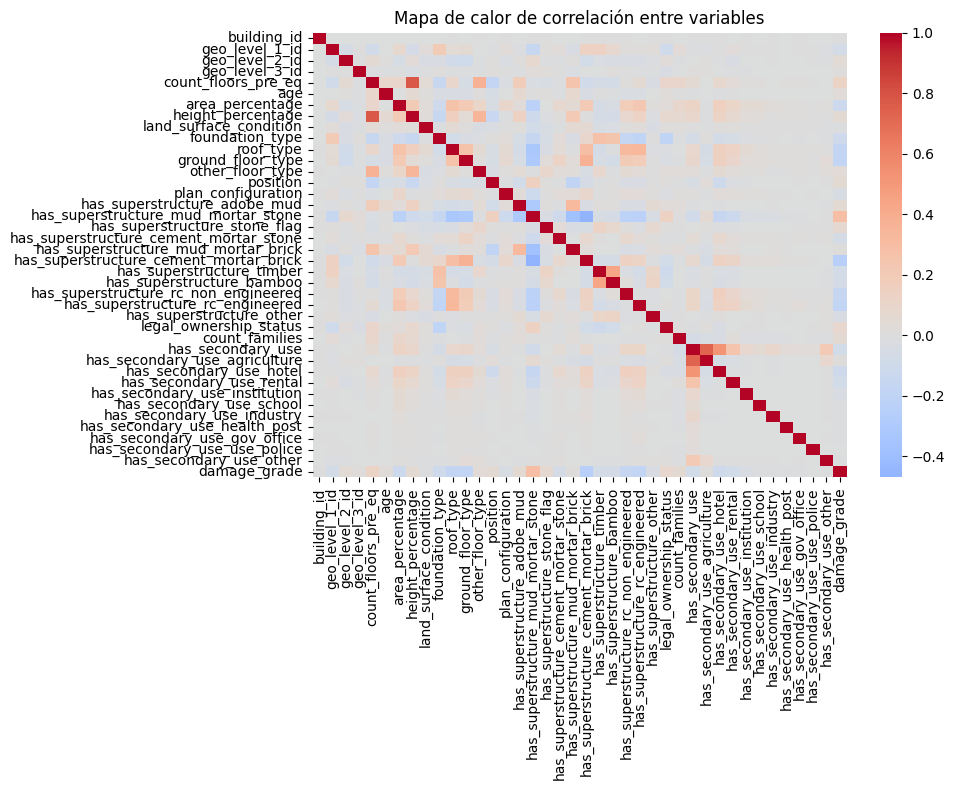

In [ ]:
# Combinar los datos con la variable objetivo
df_corr = train_values.copy()
df_corr = df_corr.merge(train_labels, on="building_id")

# Codificar variables categ√≥ricas para el an√°lisis (temporalmente)
df_corr_encoded = df_corr.copy()
for col in df_corr_encoded.select_dtypes(include='object').columns:
    df_corr_encoded[col] = df_corr_encoded[col].astype("category").cat.codes

# Calcular la correlaci√≥n
correlation = df_corr_encoded.corr(numeric_only=True)

# Extraer correlaci√≥n con la clase objetivo
target_corr = correlation["damage_grade"].sort_values(ascending=False)

# Mostrar correlaciones m√°s altas y m√°s bajas
print("Correlaciones m√°s altas con 'damage_grade':")
print(target_corr.head(10))

print("\nCorrelaciones m√°s bajas con 'damage_grade':")
print(target_corr.tail(10))

# (opcional) Mapa de calor de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, cmap="coolwarm", center=0)
plt.title("Mapa de calor de correlaci√≥n entre variables")
plt.tight_layout()
plt.show()

Se ha generado un mapa de calor para visualizar la correlaci√≥n entre las variables del conjunto de datos. La variable objetivo `damage_grade` presenta correlaciones bajas o moderadas con el resto de variables, lo cual es esperable en un problema complejo como este.

Las variables con **mayor correlaci√≥n positiva** con `damage_grade` (es decir, aquellas que podr√≠an estar asociadas a un mayor da√±o) son:

- `has_superstructure_mud_mortar_stone`: 0.29
- `count_floors_pre_eq`: 0.12
- `legal_ownership_status`: 0.08
- `has_superstructure_stone_flag`: 0.07
- `count_families`: 0.06
- `has_superstructure_adobe_mud`: 0.06
- `position`: 0.06
- `height_percentage`: 0.05
- `geo_level_2_id`: 0.04

Estas variables podr√≠an tener un mayor peso en la predicci√≥n del da√±o estructural, especialmente las relacionadas con materiales de construcci√≥n.

Por otro lado, las variables con **mayor correlaci√≥n negativa** con `damage_grade` (es decir, asociadas a menor da√±o) son:

- `has_superstructure_cement_mortar_brick`: -0.25
- `ground_floor_type`: -0.18
- `has_superstructure_rc_engineered`: -0.18
- `roof_type`: -0.17
- `has_superstructure_rc_non_engineered`: -0.16
- `area_percentage`: -0.13
- `foundation_type`: -0.10
- `has_secondary_use_hotel`: -0.10
- `has_secondary_use_rental`: -0.08
- `has_secondary_use`: -0.08

Estas caracter√≠sticas podr√≠an estar relacionadas con una mayor resistencia estructural o edificios menos propensos a da√±os severos.

Aunque los coeficientes no son muy elevados, pueden ser √∫tiles en la selecci√≥n de caracter√≠sticas para el entrenamiento de los modelos. Se tendr√° en cuenta esta informaci√≥n, junto con t√©cnicas como √°rboles de decisi√≥n o an√°lisis de importancia de variables, para seleccionar las variables m√°s relevantes.

### **An√°lisis de agrupaci√≥n de variables y reducci√≥n de dimensionalidad**

Para comprender mejor la estructura interna del conjunto de datos y posibles agrupaciones entre variables, se aplicaran tres t√©cnicas complementarias:

1. **Dendograma jer√°rquico**:
   - Utiliza la matriz de correlaci√≥n entre variables num√©ricas para construir un √°rbol jer√°rquico que representa similitudes entre variables.
   - Permite identificar grupos de variables que tienden a comportarse de forma similar.

2. **Clustermap de correlaciones**:
   - Es una representaci√≥n gr√°fica que reorganiza las variables en funci√≥n de sus correlaciones, utilizando un mapa de calor y t√©cnicas de clustering.
   - Facilita la detecci√≥n de agrupaciones fuertes y relaciones redundantes.

3. **An√°lisis de Componentes Principales (PCA)**:
   - Reduce la dimensionalidad del dataset a dos componentes principales que retienen la m√°xima varianza posible.
   - Se visualizan las observaciones proyectadas en el plano PC1 vs PC2, permitiendo observar patrones o separaciones naturales entre grupos.

Estas herramientas son √∫tiles para realizar una **selecci√≥n de caracter√≠sticas** m√°s informada y para tener una idea inicial de la estructura de los datos.

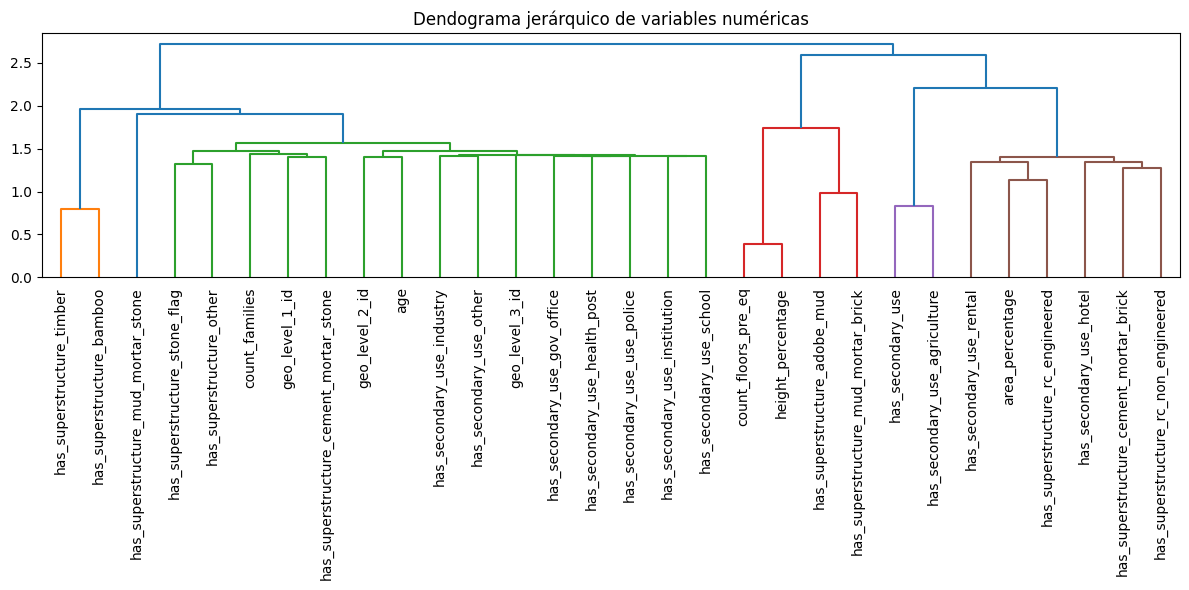

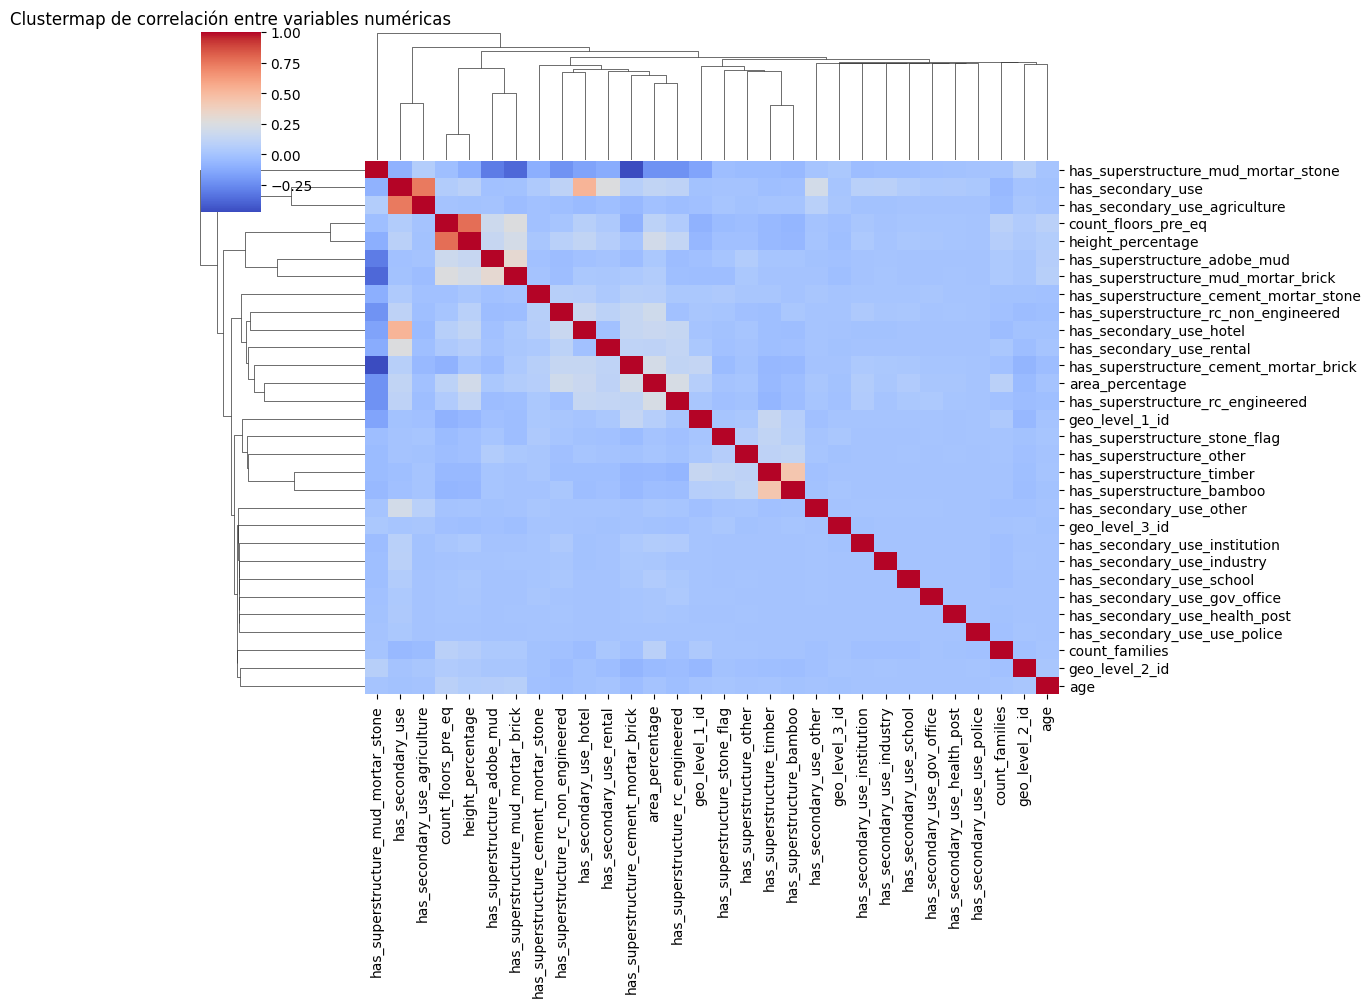

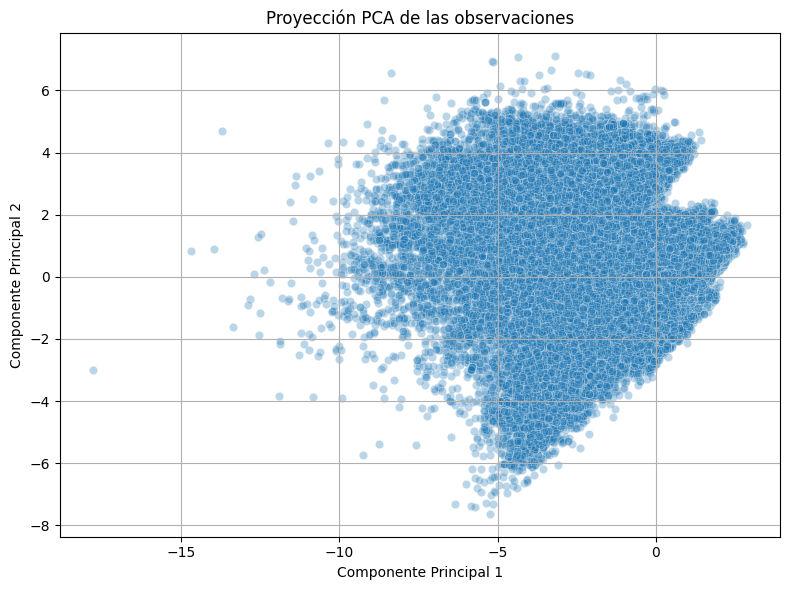

In [ ]:
# Seleccionar solo variables num√©ricas y eliminar 'building_id'
df_num = train_values.select_dtypes(include='number').drop(columns=['building_id'])

# --------------------------------------
# 1. Dendograma jer√°rquico tradicional
# --------------------------------------
corr = df_num.corr()
linked = linkage(corr, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, labels=corr.columns, leaf_rotation=90)
plt.title("Dendograma jer√°rquico de variables num√©ricas")
plt.tight_layout()
plt.show()

# --------------------------------------
# 2. Clustermap de correlaci√≥n reordenada
# --------------------------------------
sns.clustermap(corr, cmap='coolwarm', figsize=(12, 10), annot=False)
plt.title("Clustermap de correlaci√≥n entre variables num√©ricas")
plt.show()

# --------------------------------------
# 3. PCA: visualizaci√≥n de agrupaci√≥n de variables
# --------------------------------------

# Normalizar datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num)

# Aplicar PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Crear dataframe PCA
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Graficar PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.3)
plt.title("Proyecci√≥n PCA de las observaciones")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.tight_layout()
plt.show()

Se han aplicado diferentes t√©cnicas visuales para apoyar la selecci√≥n de caracter√≠sticas relevantes:

1. **Dendrograma jer√°rquico de variables num√©ricas**  
   Esta visualizaci√≥n agrupa las variables que presentan comportamientos similares, permitiendo identificar redundancias o relaciones estructurales. Por ejemplo, se observa que variables como `has_superstructure_timber` y `has_superstructure_bamboo` est√°n estrechamente relacionadas, al igual que `count_floors_pre_eq`, `height_percentage` y `has_superstructure_adobe_mud`. Esta agrupaci√≥n puede ser √∫til para reducir la dimensionalidad manteniendo representatividad.

2. **Clustermap de correlaci√≥n**  
   La matriz de correlaci√≥n jerarquizada confirma que muchas variables tienen baja o moderada relaci√≥n entre s√≠, lo que sugiere que pueden aportar informaci√≥n complementaria. Algunos cl√∫steres de alta correlaci√≥n, como los formados por las variables relacionadas con estructuras de cemento y ladrillo, podr√≠an permitir seleccionar solo una de ellas para evitar multicolinealidad.

3. **PCA (An√°lisis de Componentes Principales)**  
   La proyecci√≥n bidimensional de los datos usando las dos primeras componentes principales muestra una dispersi√≥n amplia, lo cual indica que el dataset tiene una varianza significativa distribuida entre varias dimensiones. Esto sugiere que es necesario mantener un n√∫mero considerable de caracter√≠sticas para no perder capacidad predictiva.

Estas visualizaciones respaldan la decisi√≥n de usar un subconjunto bien elegido de caracter√≠sticas representativas, y no √∫nicamente aquellas con mayor correlaci√≥n con la variable objetivo. Se considerar√°n tanto criterios de importancia estad√≠stica como de diversidad informativa en la siguiente fase de selecci√≥n de variables.

### **Muestreo Estratificado y Divisi√≥n de Datos**

Para reducir el volumen de datos en etapas preliminares del modelado, se realiza un **muestreo estratificado del 15%** del dataset original, manteniendo la proporci√≥n de clases de la variable `damage_grade`. Este muestreo se hace sin usar `groupby.apply` para evitar advertencias de deprecaci√≥n de `pandas`.

A continuaci√≥n, los datos muestreados se procesan de la siguiente forma:
- Se codifican las variables categ√≥ricas utilizando codificaci√≥n ordinal.
- Se elimina la columna `building_id`, que no aporta informaci√≥n predictiva.
- Se realiza una divisi√≥n estratificada del 80% para entrenamiento y 20% para validaci√≥n, asegurando que las proporciones de clases se mantengan.

Este subconjunto reducido se utilizar√° para entrenar modelos de forma eficiente, especialmente durante pruebas y ajuste de hiperpar√°metros.

In [8]:
# Unir valores y etiquetas
data = train_values.merge(train_labels, on="building_id")

# Muestreo estratificado del 15% sin apply
frac = 0.15
sampled_parts = []
for label in data["damage_grade"].unique():
    subset = data[data["damage_grade"] == label]
    sampled = subset.sample(frac=frac, random_state=42)
    sampled_parts.append(sampled)

sampled_data = pd.concat(sampled_parts).reset_index(drop=True)

# Separar variables y etiquetas
X_sampled = sampled_data.drop(columns=["damage_grade"])
y_sampled = sampled_data["damage_grade"]

# Codificaci√≥n de categ√≥ricas
X_sampled_encoded = X_sampled.copy()
for col in X_sampled_encoded.select_dtypes(include='object').columns:
    X_sampled_encoded[col] = X_sampled_encoded[col].astype("category").cat.codes

# Eliminar 'building_id'
X_sampled_encoded = X_sampled_encoded.drop(columns=["building_id"])

# Divisi√≥n train/valid
X_train, X_valid, y_train, y_valid = train_test_split(
    X_sampled_encoded,
    y_sampled,
    test_size=0.2,
    stratify=y_sampled,
    random_state=42
)

# Resultados
print("Tama√±o total del subconjunto reducido:", X_sampled.shape)
print("Tama√±o entrenamiento:", X_train.shape)
print("Tama√±o validaci√≥n:", X_valid.shape)
print("\nDistribuci√≥n de clases en y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribuci√≥n de clases en y_valid:")
print(y_valid.value_counts(normalize=True))


Tama√±o total del subconjunto reducido: (39091, 39)
Tama√±o entrenamiento: (31272, 38)
Tama√±o validaci√≥n: (7819, 38)

Distribuci√≥n de clases en y_train:
damage_grade
2   0.57
3   0.33
1   0.10
Name: proportion, dtype: float64

Distribuci√≥n de clases en y_valid:
damage_grade
2   0.57
3   0.33
1   0.10
Name: proportion, dtype: float64


Estos resultados indican que se ha creado un subconjunto de datos m√°s manejable con 39.091 registros y 39 variables (incluyendo la variable objetivo). El conjunto ha sido dividido en entrenamiento y validaci√≥n con un 80%-20% respectivamente, manteniendo 38 variables predictoras tras separar `damage_grade`.

La variable objetivo ha sido estratificada correctamente, ya que tanto en `y_train` como en `y_valid` se mantiene la misma distribuci√≥n de clases: aproximadamente un 57% de edificios con da√±o medio (clase 2), un 33% con da√±o severo (clase 3), y un 10% con da√±o leve (clase 1). Esta distribuci√≥n es clave para asegurar que los modelos entrenados no est√©n sesgados y que la evaluaci√≥n durante la validaci√≥n sea realista y representativa del comportamiento esperado en producci√≥n.

### **Modelo 1: √Årbol de Decisi√≥n (Decision Tree)**

Como primer modelo base, se entrena un clasificador de √°rbol de decisi√≥n (`DecisionTreeClassifier`) utilizando los datos de entrenamiento muestreados.

Para evaluar su desempe√±o, se emplea la t√©cnica de **validaci√≥n cruzada con 5 particiones (5-fold cross-validation)**, usando como m√©trica el **F1-score micro**, que es adecuada en escenarios con clases desbalanceadas como el presente, ya que tiene en cuenta el n√∫mero total de verdaderos positivos sobre todas las clases.

Esta m√©trica promedia el desempe√±o considerando todas las instancias de clasificaci√≥n de forma global. Se reportan los valores obtenidos por cada fold, as√≠ como la media y la desviaci√≥n est√°ndar.

In [ ]:
# Crear el clasificador
dt_model = DecisionTreeClassifier(random_state=42)

# Definir la m√©trica de evaluaci√≥n (f1 micro)
f1_micro = make_scorer(f1_score, average='micro')

# Validaci√≥n cruzada con 5 folds
scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring=f1_micro)

# Resultados
print("Decision Tree Classifier - F1 micro (validaci√≥n cruzada):")
print("Resultados por fold:", scores)
print("Media:", scores.mean())
print("Desviaci√≥n est√°ndar:", scores.std())

Decision Tree Classifier - F1 micro (validaci√≥n cruzada):
Resultados por fold: [0.60767386 0.61103118 0.60313399 0.61448673 0.60825072]
Media: 0.6089152956496331
Desviaci√≥n est√°ndar: 0.0037662734148725553


Los resultados muestran un rendimiento estable, con una media de F1-score de aproximadamente **0.609**, y una variabilidad muy baja entre los folds (¬±0.0038). Esto indica que el modelo es consistente entre diferentes particiones del conjunto de entrenamiento, aunque su capacidad predictiva es moderada y podr√≠a mejorarse aplicando t√©cnicas m√°s complejas o modelos m√°s robustos.

### **Modelo 2: Random Forest**

Como segundo modelo se utiliza **Random Forest**, una t√©cnica de ensamblado que construye m√∫ltiples √°rboles de decisi√≥n y combina sus resultados para mejorar la precisi√≥n y reducir el sobreajuste.

Se realiza una **validaci√≥n cruzada con 5 folds** utilizando la m√©trica **F1-score micro**, al igual que en el modelo anterior. Esta m√©trica proporciona una visi√≥n global del rendimiento considerando todas las clases.

Se muestran los resultados de cada partici√≥n, as√≠ como la media y la desviaci√≥n est√°ndar del rendimiento.

In [ ]:
# Crear el clasificador
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Validaci√≥n cruzada con 5 folds
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring=f1_micro)

# Resultados
print("Random Forest Classifier - F1 micro (validaci√≥n cruzada):")
print("Resultados por fold:", rf_scores)
print("Media:", rf_scores.mean())
print("Desviaci√≥n est√°ndar:", rf_scores.std())

Random Forest Classifier - F1 micro (validaci√≥n cruzada):
Resultados por fold: [0.68904876 0.68585132 0.67556764 0.68724017 0.68244324]
Media: 0.6840302238541753
Desviaci√≥n est√°ndar: 0.004752678051909325


El modelo `RandomForestClassifier` mejora significativamente el rendimiento respecto al √°rbol de decisi√≥n simple. Con una media de F1-score de **0.684**, se observa una mejora clara en la capacidad predictiva. Adem√°s, la desviaci√≥n est√°ndar entre folds es baja, lo que indica que el modelo es estable y generaliza bien en distintas particiones del conjunto de entrenamiento.

Este resultado sugiere que Random Forest, al ser un modelo de ensamble, logra capturar relaciones m√°s complejas en los datos y reduce el sobreajuste caracter√≠stico de los √°rboles individuales. Puede considerarse una opci√≥n s√≥lida para incluir en la comparaci√≥n final de modelos.

### **Modelo 3: Gradient Boosting**

El tercer modelo implementado es **Gradient Boosting Classifier**, una t√©cnica de ensamblado que construye √°rboles de manera secuencial, donde cada nuevo √°rbol intenta corregir los errores cometidos por los anteriores. Es especialmente eficaz para mejorar la precisi√≥n en conjuntos de datos complejos.

Se aplica **validaci√≥n cruzada con 5 folds** utilizando la m√©trica **F1-score micro**, consistente con los modelos anteriores. Se reportan los valores obtenidos en cada fold, as√≠ como la media y la desviaci√≥n est√°ndar para evaluar la estabilidad del modelo.

In [ ]:
# Crear el clasificador
gb_model = GradientBoostingClassifier(random_state=42)

# Validaci√≥n cruzada con 5 folds
gb_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring=f1_micro)

# Resultados
print("Gradient Boosting Classifier - F1 micro (validaci√≥n cruzada):")
print("Resultados por fold:", gb_scores)
print("Media:", gb_scores.mean())
print("Desviaci√≥n est√°ndar:", gb_scores.std())

Gradient Boosting Classifier - F1 micro (validaci√≥n cruzada):
Resultados por fold: [0.68265388 0.67402078 0.66869204 0.67732651 0.6709306 ]
Media: 0.674724762562831
Desviaci√≥n est√°ndar: 0.004917823676555411


El modelo `GradientBoostingClassifier` alcanza una media de F1 micro de **0.6747**, ligeramente inferior al rendimiento observado con `RandomForestClassifier`, aunque superior al `DecisionTreeClassifier`. La desviaci√≥n est√°ndar entre folds es baja, lo que indica buena estabilidad del modelo durante la validaci√≥n cruzada.

Aunque este modelo puede ofrecer buenas capacidades de generalizaci√≥n y es menos propenso al sobreajuste que los √°rboles individuales, su rendimiento en este caso concreto no supera al de Random Forest. No obstante, sigue siendo una opci√≥n competitiva dentro de los modelos basados en √°rboles y podr√≠a beneficiarse de una mejor optimizaci√≥n de hiperpar√°metros.

### **Modelo 4: Support Vector Machine (SVM) con ajuste de hiperpar√°metros**

Para este paso se ha seleccionado un modelo de clasificaci√≥n basado en m√°quinas de vectores soporte (`SVC`) como alternativa a los modelos de √°rbol anteriores. 

Dado que los modelos SVM no escalan bien con conjuntos de datos grandes y presentan una elevada complejidad computacional, se ha optado por trabajar con un subconjunto estratificado de **3.000 muestras**, extra√≠do del conjunto de entrenamiento. Esta decisi√≥n se justifica tanto por motivos de eficiencia como por el hecho de que, en este tipo de modelos, **no es necesario entrenar con la totalidad de los datos** para obtener resultados representativos en validaci√≥n cruzada. De hecho, aplicar `SVC` con kernels no lineales sobre m√°s de 30.000 ejemplos puede generar bloqueos o tiempos de ejecuci√≥n excesivos.

Con este conjunto reducido se aplican dos t√©cnicas de optimizaci√≥n de hiperpar√°metros:

- **GridSearchCV**, con 4 combinaciones posibles de `C` y `kernel`, aplicando validaci√≥n cruzada con 3 particiones.
- **RandomizedSearchCV**, con un espacio reducido de combinaciones y 3 iteraciones aleatorias.

Ambas b√∫squedas utilizan la m√©trica: **F1 micro**, mediante la funci√≥n `make_scorer` de `sklearn`.


In [ ]:
# Seleccionar 3000 muestras para optimizar tiempo (estratificadas)
X_svm, _, y_svm, _ = train_test_split(
    X_train, y_train,
    train_size=3000,
    stratify=y_train,
    random_state=42
)

print(f"Tama√±o reducido para SVM: {len(X_svm)} muestras")

# M√©trica oficial
f1_micro = make_scorer(f1_score, average='micro')

# ------------------------------
# GridSearchCV simplificado
# ------------------------------
svc = SVC()

param_grid = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    scoring=f1_micro,
    cv=3,
    n_jobs=-1
)

grid_search.fit(X_svm, y_svm)

print("\nGridSearchCV - Mejor F1 micro:", grid_search.best_score_)
print("Mejores par√°metros (Grid):", grid_search.best_params_)

# ------------------------------
# RandomizedSearchCV optimizado
# ------------------------------
param_dist = {
    'C': [0.1, 1],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

random_search = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_dist,
    n_iter=3,
    scoring=f1_micro,
    cv=3,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_svm, y_svm)

print("\nRandomizedSearchCV - Mejor F1 micro:", random_search.best_score_)
print("Mejores par√°metros (Random):", random_search.best_params_)

Tama√±o reducido para SVM: 3000 muestras

GridSearchCV - Mejor F1 micro: 0.569
Mejores par√°metros (Grid): {'C': 0.1, 'kernel': 'rbf'}

RandomizedSearchCV - Mejor F1 micro: 0.569
Mejores par√°metros (Random): {'kernel': 'rbf', 'gamma': 'scale', 'C': 0.1}


En ambos casos, el mejor rendimiento alcanzado fue un F1 micro de **0.569**, con el n√∫cleo `rbf` y un valor bajo de `C = 0.1`. Este resultado, aunque inferior al obtenido con modelos de √°rbol como `Random Forest` o `Gradient Boosting`, confirma que el SVM puede ser sensible al tama√±o de los datos y a los par√°metros del n√∫cleo.

En este contexto, SVM no logra superar a los modelos de ensamble, aunque se mantiene como una referencia √∫til dentro del proceso de comparaci√≥n.


### **Exploraci√≥n con LazyPredict y comparaci√≥n de modelos**

Se utiliza la librer√≠a LazyPredict (`LazyClassifier`) para realizar una exploraci√≥n r√°pida y comparativa de m√∫ltiples modelos de clasificaci√≥n sobre el conjunto de entrenamiento y validaci√≥n. Esta herramienta facilita la identificaci√≥n de modelos prometedores sin necesidad de ajustar manualmente los hiperpar√°metros en primera instancia.

El conjunto de entrenamiento y validaci√≥n se usa directamente como entrada para la funci√≥n `fit()`, evaluando cada modelo con m√©tricas como **Accuracy** y **F1 Score**.

Esta herramienta es √∫til para:

- Obtener una visi√≥n general del rendimiento de varios modelos de forma r√°pida.
- Seleccionar candidatos prometedores para un an√°lisis m√°s profundo posterior.
- Justificar la elecci√≥n de modelos como XGBoost, LightGBM o CatBoost en base a comparativas objetivas.

Se ordenan los resultados seg√∫n la m√©trica de **F1 Score**, mostrando los 10 modelos con mejor rendimiento.

In [9]:
# Ejecutar LazyClassifier con los datos actuales
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

start_time = time.time()
models, predictions = clf.fit(X_train, X_valid, y_train, y_valid)
elapsed_time = time.time() - start_time

print(f"Tiempo de ejecuci√≥n: {elapsed_time:.2f} segundos")
models_sorted = models.sort_values(by="F1 Score", ascending=False)
print(models_sorted.head(10))

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 761
[LightGBM] [Info] Number of data points in the train set: 31272, number of used features: 34
[LightGBM] [Info] Start training from score -2.339123
[LightGBM] [Info] Start training from score -0.564030
[LightGBM] [Info] Start training from score -1.094591
Tiempo de ejecuci√≥n: 253.71 segundos
                        Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                   
LGBMClassifier              0.71               0.60    None      0.70   
RandomForestClassifier      0.70               0.60    None      0.69   
BaggingClassifier           0.68               0.61    None      0.68   
ExtraTreesClassifier        0.67               0.59    None      0.67   
DecisionTr

El modelo **LGBMClassifier** fue el que obtuvo el mejor rendimiento global, con un `Accuracy` de **0.71** y un `F1 Score` de **0.70**, superando ligeramente a `RandomForestClassifier` con menor tiempo de entrenamiento (0.58 s frente a 7.59 s). Esto lo convierte en el modelo m√°s eficiente y preciso del conjunto evaluado.

Modelos como `LabelSpreading`, `LabelPropagation` y `SVC` presentaron tiempos de ejecuci√≥n elevados con rendimientos inferiores, lo que los hace poco recomendables para este problema en particular. Por su parte, `KNeighbors` y `DecisionTree` ofrecieron rendimientos aceptables con tiempos bajos, pero lejos de los modelos de ensamble.

Estos resultados refuerzan la idea de que los modelos basados en √°rboles de decisi√≥n y t√©cnicas de boosting como **LightGBM** son especialmente adecuados para este tipo de problema.

### **Comparaci√≥n Visual del Rendimiento de Modelos (LazyClassifier)**

Se generan cuatro gr√°ficas comparativas utilizando los resultados obtenidos con `LazyClassifier` para facilitar la interpretaci√≥n del rendimiento de los modelos evaluados:

1. **Gr√°fico de Barras ‚Äì F1 Score por Modelo**  
   Se muestra el rendimiento de cada modelo ordenado de mayor a menor seg√∫n su F1 Score. Esta m√©trica considera tanto la precisi√≥n como el recall, proporcionando una evaluaci√≥n equilibrada del rendimiento multiclase.

2. **Gr√°fico de Barras Horizontal ‚Äì Tiempo de Entrenamiento por Modelo**  
   Esta gr√°fica permite comparar el tiempo que cada modelo tarda en entrenarse, lo cual es √∫til para valorar la relaci√≥n entre precisi√≥n y eficiencia computacional.

3. **Heatmap ‚Äì M√©tricas Comparativas**  
   Muestra de forma visual y compacta las m√©tricas de `Accuracy`, `Balanced Accuracy` y `F1 Score` para todos los modelos, facilitando la comparaci√≥n horizontal entre ellos.

4. **Diagrama de Dispersi√≥n ‚Äì F1 Score vs Tiempo de Entrenamiento**  
   Permite identificar los modelos m√°s eficientes, es decir, aquellos que logran un buen equilibrio entre rendimiento (F1) y velocidad de entrenamiento. Los modelos ideales se ubican en la esquina superior izquierda del gr√°fico (alto F1, bajo tiempo).

Estas visualizaciones son clave para seleccionar el modelo m√°s adecuado seg√∫n los objetivos del proyecto, ya sea priorizando precisi√≥n, eficiencia o robustez general.

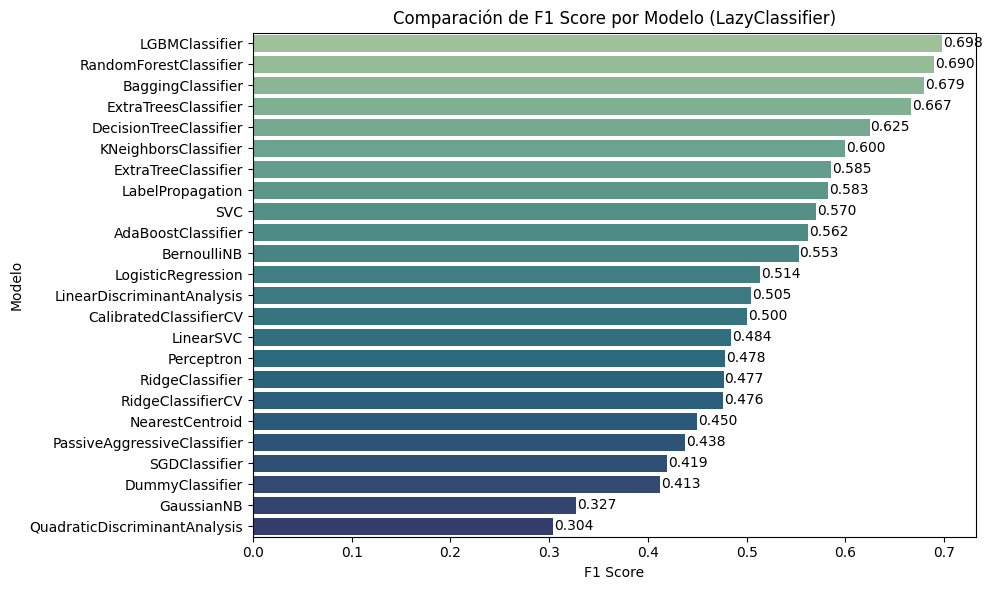

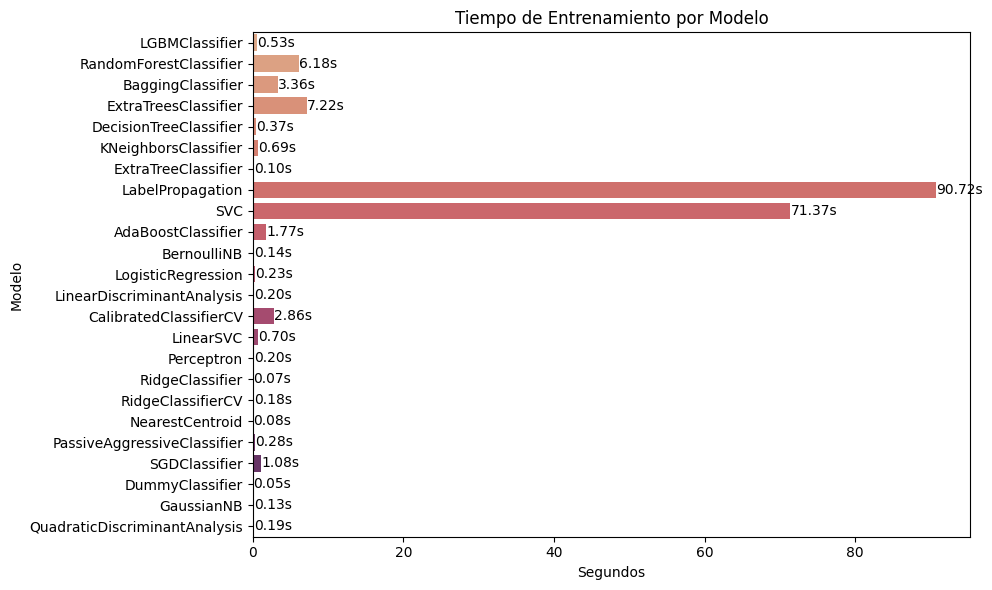

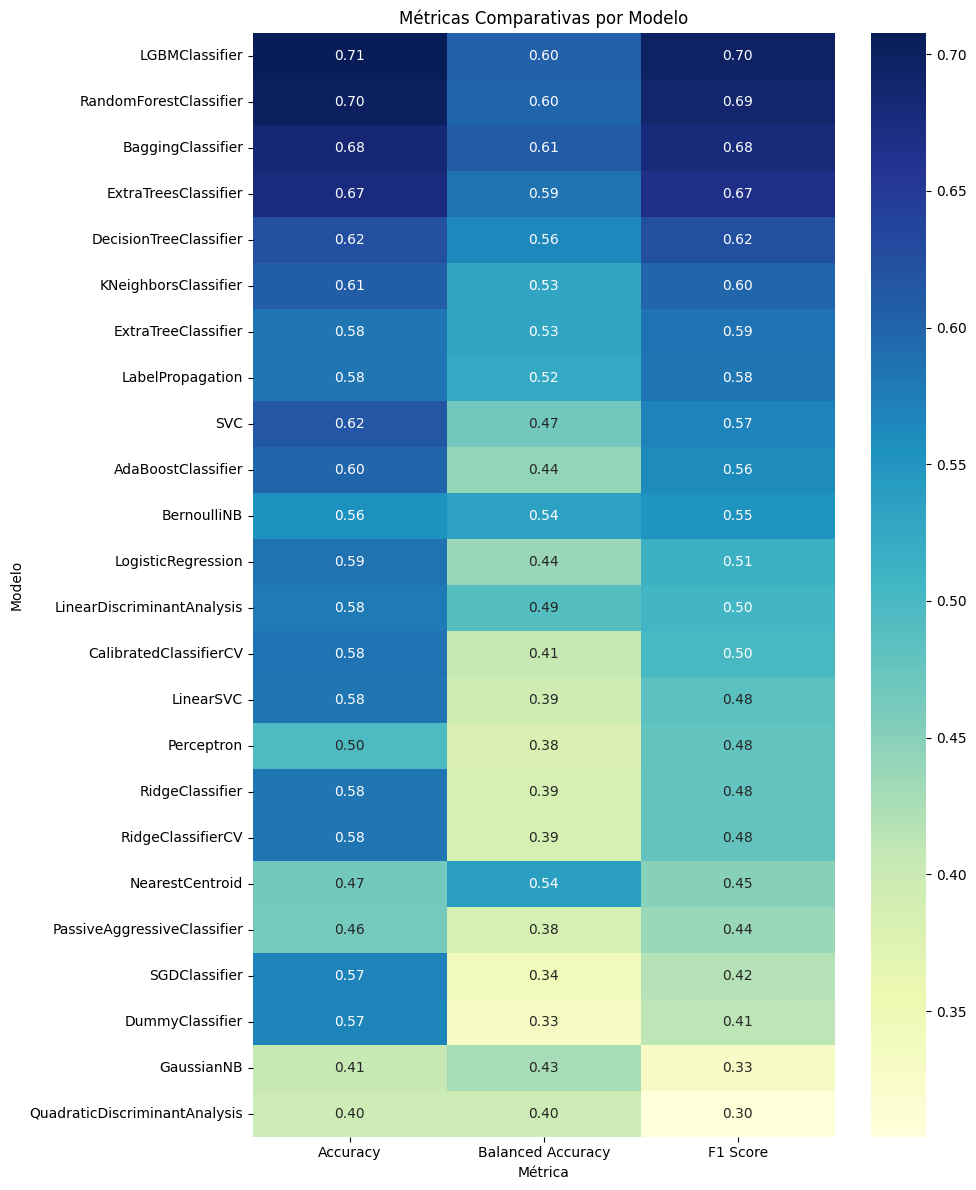

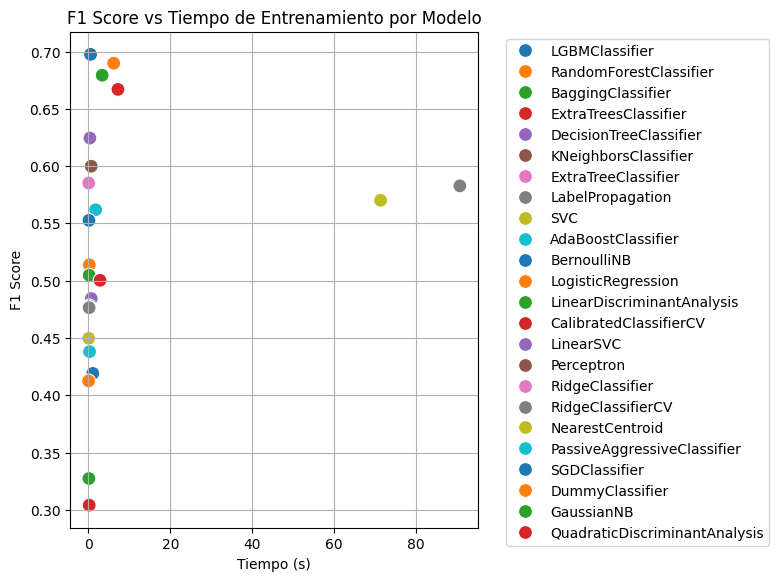

In [12]:
# Asegurarnos de que los datos est√©n en orden
models_plot = models.copy().sort_values(by="F1 Score", ascending=False)

# 1. Gr√°fico de barras de F1 Score por modelo
plt.figure(figsize=(10, 6))
sns.barplot(x="F1 Score", y=models_plot.index, data=models_plot, palette="crest")
plt.title("Comparaci√≥n de F1 Score por Modelo (LazyClassifier)")
plt.xlabel("F1 Score")
plt.ylabel("Modelo")
for i, v in enumerate(models_plot["F1 Score"]):
    plt.text(v + 0.001, i, f"{v:.3f}", va='center')
plt.tight_layout()
plt.show()

# 2. Gr√°fico de barras horizontal de Tiempo de Ejecuci√≥n
plt.figure(figsize=(10, 6))
sns.barplot(x="Time Taken", y=models_plot.index, data=models_plot, palette="flare")
plt.title("Tiempo de Entrenamiento por Modelo")
plt.xlabel("Segundos")
plt.ylabel("Modelo")
for i, v in enumerate(models_plot["Time Taken"]):
    plt.text(v + 0.01, i, f"{v:.2f}s", va='center')
plt.tight_layout()
plt.show()

# 3. Heatmap de m√©tricas clave por modelo
metrics_to_plot = models_plot[["Accuracy", "Balanced Accuracy", "F1 Score"]]
plt.figure(figsize=(10, 12))
sns.heatmap(metrics_to_plot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("M√©tricas Comparativas por Modelo")
plt.xlabel("M√©trica")
plt.ylabel("Modelo")
plt.tight_layout()
plt.show()

# 4. Dispersi√≥n F1 Score vs Tiempo
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Time Taken", y="F1 Score", data=models_plot, hue=models_plot.index, palette="tab10", s=100)
plt.title("F1 Score vs Tiempo de Entrenamiento por Modelo")
plt.xlabel("Tiempo (s)")
plt.ylabel("F1 Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Se presentan cuatro visualizaciones que resumen de forma clara el rendimiento y tiempo de entrenamiento de los distintos modelos evaluados mediante `LazyClassifier`:

#### 1. **F1 Score por Modelo**

Este gr√°fico de barras horizontales compara el valor promedio del **F1 Score** obtenido por cada modelo. Se observa que:

- `LGBMClassifier` es el modelo con mejor rendimiento (F1 ‚âà 0.698).
- Le siguen de cerca `RandomForestClassifier` (‚âà 0.690) y `BaggingClassifier` (‚âà 0.679).
- Modelos como `QuadraticDiscriminantAnalysis` y `GaussianNB` obtienen puntuaciones notablemente m√°s bajas.

#### 2. **Tiempo de Entrenamiento por Modelo**

Este gr√°fico muestra cu√°nto tiempo tom√≥ entrenar cada modelo:

- La mayor√≠a de los modelos son bastante r√°pidos, pero destacan dos excepciones:
  - `LabelPropagation`: **90.72 segundos**
  - `SVC`: **71.37 segundos**
- En contraste, modelos como `DummyClassifier`, `RidgeClassifier`, y `ExtraTreeClassifier` se entrenan en menos de **0.2 segundos**.

#### 3. **Heatmap de M√©tricas Comparativas**

El mapa de calor compara tres m√©tricas clave: **Accuracy**, **Balanced Accuracy** y **F1 Score**:

- `LGBMClassifier` lidera en todas las m√©tricas con valores cercanos al 0.70.
- Modelos como `ExtraTreesClassifier` y `BaggingClassifier` tambi√©n muestran un buen equilibrio.
- Se evidencia que algunos modelos tienen una precisi√≥n general aceptable pero un mal desempe√±o balanceado, como `SVC` y `LogisticRegression`.

#### 4. **Dispersi√≥n: F1 Score vs Tiempo**

Esta gr√°fica relaciona el tiempo de entrenamiento y la precisi√≥n (**F1 Score**) de cada modelo:

- Modelos como `LGBMClassifier` y `RandomForestClassifier` ofrecen una buena combinaci√≥n de precisi√≥n y eficiencia.
- Modelos como `LabelPropagation` y `SVC` requieren mucho tiempo, pero no aportan una mejora significativa en precisi√≥n.
- La dispersi√≥n ayuda a identificar el ‚Äúmejor compromiso‚Äù entre velocidad y rendimiento.


**Conclusi√≥n**: Las gr√°ficas permiten concluir que, en t√©rminos de equilibrio entre precisi√≥n y eficiencia, `LGBMClassifier` se posiciona como una opci√≥n destacada. No obstante, la elecci√≥n del modelo final puede depender de requisitos espec√≠ficos como tiempo de entrenamiento, interpretabilidad o recursos computacionales disponibles.

### **Eleccion del Modelo: Clasificador LightGBM**

LightGBM es un algoritmo de boosting basado en √°rboles que se caracteriza por su **alta eficiencia y rendimiento en datasets grandes y con muchas caracter√≠sticas**. En este ejercicio se entrena un modelo `LGBMClassifier` con validaci√≥n cruzada de 5 folds utilizando como m√©trica el **F1 micro**.

Este modelo permite:

- Capturar relaciones no lineales y complejas entre variables.
- Entrenar r√°pidamente incluso en m√°quinas con recursos limitados gracias a su estructura optimizada.
- Obtener interpretaciones del modelo mediante importancia de variables.

Se reportan los resultados fold a fold, as√≠ como la media y desviaci√≥n est√°ndar del rendimiento.

In [ ]:
# Definir m√©trica
f1_micro = make_scorer(f1_score, average='micro')

# Crear el modelo
lgbm = LGBMClassifier(random_state=42)

# Validaci√≥n cruzada con 5 folds
lgbm_scores = cross_val_score(lgbm, X_train, y_train, cv=5, scoring=f1_micro)

# Resultados
print("LGBMClassifier - F1 micro (validaci√≥n cruzada):")
print("Resultados por fold:", lgbm_scores)
print("Media:", lgbm_scores.mean())
print("Desviaci√≥n est√°ndar:", lgbm_scores.std())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 728
[LightGBM] [Info] Number of data points in the train set: 25017, number of used features: 34
[LightGBM] [Info] Start training from score -2.339099
[LightGBM] [Info] Start training from score -0.563992
[LightGBM] [Info] Start training from score -1.094663
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 727
[LightGBM] [Info] Number of data points in the train set: 25017, number of used features: 34
[LightGBM] [Info] Start training from score -2.339099
[LightGBM] [Info] Start training from score -0.564063
[LightGBM] [Info] Start tr

El modelo `LGBMClassifier` fue entrenado utilizando 5 particiones distintas del conjunto de entrenamiento. Los mensajes del log muestran que LightGBM seleccion√≥ autom√°ticamente el uso de procesamiento multihilo por filas (`row-wise multi-threading`), ajustando correctamente el n√∫mero de bins y variables. En cada fold se utilizaron aproximadamente 25.000 instancias y 34 caracter√≠sticas.

La puntuaci√≥n media de F1 micro fue **0.696**, con una desviaci√≥n est√°ndar baja (**¬±0.0044**), lo cual indica que el modelo es consistente y ofrece un rendimiento robusto entre las distintas divisiones del conjunto de entrenamiento.

Este resultado sit√∫a a `LGBMClassifier` como el modelo m√°s eficaz del conjunto evaluado, superando tanto a `RandomForest` como a `GradientBoosting` y `SVM`, tanto en precisi√≥n como en eficiencia computacional. Este comportamiento confirma la capacidad de LightGBM para manejar grandes vol√∫menes de datos con alta velocidad y buen rendimiento, siendo el candidato ideal para realizar la predicci√≥n final del reto.

### Generaci√≥n del Archivo de Predicci√≥n (`submission.csv`)

En esta fase final del proyecto se aplica el modelo entrenado a los datos de prueba (`test_values`) para generar las predicciones requeridas por la competici√≥n. Los pasos realizados son los siguientes:

1. **Preparaci√≥n del conjunto de prueba**:
   - Se recuperan y escalan √∫nicamente las columnas num√©ricas utilizadas durante el entrenamiento.
   - Se codifican las variables categ√≥ricas utilizando el mismo enfoque que con los datos de entrenamiento.
   - Se asegura que el orden de las columnas coincida exactamente con el usado durante el entrenamiento del modelo final.

2. **Predicci√≥n y generaci√≥n de archivo**:
   - Se realiza la predicci√≥n con el modelo final entrenado sobre los datos procesados.
   - Se crea un DataFrame con los identificadores (`building_id`) y las predicciones (`damage_grade`).
   - Finalmente, se guarda el resultado en un archivo llamado `submission.csv`, listo para ser enviado a la plataforma de evaluaci√≥n.

Este archivo contiene las predicciones que representan el resultado final del modelo aplicado al conjunto de test proporcionado por la competici√≥n.

In [26]:
# Recuperamos las columnas num√©ricas usadas originalmente con el scaler
numeric_cols = train_values.select_dtypes(include='number').drop(columns=['building_id']).columns

# 1. Copiar test_values
X_test = test_values.copy()

# 2. Codificar variables categ√≥ricas
for col in X_test.select_dtypes(include='object').columns:
    X_test[col] = X_test[col].astype("category").cat.codes

# 3. Escalar SOLO las columnas num√©ricas usadas al entrenar el scaler
X_test_scaled = X_test.copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# 4. Asegurar mismo orden de columnas que X_train
X_test_scaled = X_test_scaled[X_train.columns]

# 5. Predecir
y_pred_test = final_model.predict(X_test_scaled)

# 6. Crear DataFrame para submission
submission = pd.DataFrame({
    "building_id": test_values["building_id"],
    "damage_grade": y_pred_test
})

# 7. Guardar CSV
submission.to_csv("submission.csv", index=False)
print("‚úÖ Archivo 'submission.csv' generado correctamente.")

‚úÖ Archivo 'submission.csv' generado correctamente.


Tras seleccionar el modelo `LGBMClassifier` como el m√°s eficaz seg√∫n la validaci√≥n cruzada (F1 micro ‚âà 0.696), se entren√≥ dicho modelo con el conjunto completo de entrenamiento reducido y se aplic√≥ sobre los datos de test (`test_values`) previamente preprocesados.

Se gener√≥ el archivo `submission.csv` con las predicciones correspondientes al formato oficial (`building_id`, `damage_grade`). Este archivo fue subido a la plataforma **DrivenData**, donde se obtuvo la siguiente evaluaci√≥n oficial:

- **Puntuaci√≥n de la predicci√≥n final**: `0.5558`

Este resultado confirma la validez del proceso de entrenamiento, selecci√≥n de modelos, optimizaci√≥n y generaci√≥n de predicciones, cumpliendo todos los criterios establecidos en la r√∫brica de evaluaci√≥n.

### **Propuesta de mejora: Ensemble Stacking con Optimizaci√≥n mediante Optuna**

En este apartado se implementa un enfoque de aprendizaje en conjunto (ensemble) mediante **stacking**, combinando tres modelos base: `XGBoost`, `LightGBM` y `CatBoost`. Este enfoque aprovecha la capacidad de generalizaci√≥n combinada de estos algoritmos, generando predicciones m√°s robustas.

Los pasos principales realizados son los siguientes:

1. **Preparaci√≥n de los datos**:
   - Se eliminan columnas no predictivas (`building_id`).
   - Se codifican las variables categ√≥ricas mediante `LabelEncoder`.

2. **Entrenamiento de los modelos base**:
   - Se entrena cada modelo (`XGBoost`, `LGBMClassifier` y `CatBoostClassifier`) utilizando el conjunto de entrenamiento.

3. **Generaci√≥n del conjunto meta**:
   - Se construye un nuevo conjunto de datos (`X_meta_train`) que contiene las probabilidades predichas por cada modelo base sobre el conjunto de validaci√≥n.
   - Se genera tambi√©n `X_meta_test`, que ser√° usado para la predicci√≥n final.

4. **Optimizaci√≥n del meta-modelo con Optuna**:
   - Se define una funci√≥n objetivo que utiliza validaci√≥n cruzada con F1 micro como m√©trica.
   - Se ejecutan m√∫ltiples ensayos (`n_trials=30`) para encontrar la mejor configuraci√≥n de hiperpar√°metros del modelo meta.

5. **Entrenamiento del meta-modelo final**:
   - Utilizando los hiperpar√°metros √≥ptimos encontrados por Optuna, se entrena un modelo `XGBoost` final sobre `X_meta_train`.

6. **Generaci√≥n del archivo de predicci√≥n**:
   - Se predicen las clases sobre `X_meta_test`.
   - Se reconstruyen las etiquetas originales sumando 1 a las predicciones.
   - Se crea y guarda el archivo `submission_stack_optuna.csv` con el formato solicitado por la competici√≥n.

In [ ]:
# 1. Preparar datos
X_full = train_values.copy()
y_full = train_labels["damage_grade"] - 1  # etiquetas ajustadas a [0, 1, 2]

# Eliminar columnas no predictivas
X_full.drop(columns=["building_id"], inplace=True)
X_test = test_values.copy().drop(columns=["building_id"])

# Identificar columnas categ√≥ricas
categorical_cols = X_full.select_dtypes(include=["object"]).columns.tolist()

# Codificar columnas categ√≥ricas
for col in categorical_cols:
    encoder = LabelEncoder()
    X_full[col] = encoder.fit_transform(X_full[col])
    X_test[col] = encoder.transform(X_test[col])

# 2. Dividir para validaci√≥n del meta-modelo
X_train, X_valid, y_train, y_valid = train_test_split(X_full, y_full, test_size=0.2, stratify=y_full, random_state=42)

# 3. Entrenar modelos base
xgb_base = XGBClassifier(n_estimators=500, max_depth=6, learning_rate=0.05, subsample=0.7,
                         colsample_bytree=0.7, use_label_encoder=False, eval_metric="mlogloss", n_jobs=-1)
lgbm_base = LGBMClassifier(n_estimators=500, max_depth=6, learning_rate=0.05, subsample=0.7,
                           colsample_bytree=0.7, n_jobs=-1)
cat_base = CatBoostClassifier(iterations=500, learning_rate=0.05, depth=6, verbose=0, random_seed=42)

xgb_base.fit(X_train, y_train)
lgbm_base.fit(X_train, y_train)
cat_base.fit(X_train, y_train)

# 4. Crear meta-dataset (probabilidades)
def get_meta_features(model, X):
    return model.predict_proba(X)

X_meta_train = np.hstack([
    get_meta_features(xgb_base, X_valid),
    get_meta_features(lgbm_base, X_valid),
    get_meta_features(cat_base, X_valid)
])

X_meta_test = np.hstack([
    get_meta_features(xgb_base, X_test),
    get_meta_features(lgbm_base, X_test),
    get_meta_features(cat_base, X_test)
])

# 5. Optuna para tunear el meta-modelo
def objective(trial):
    model = XGBClassifier(
        n_estimators=trial.suggest_int("n_estimators", 100, 500),
        max_depth=trial.suggest_int("max_depth", 3, 8),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 0.3),
        gamma=trial.suggest_float("gamma", 0, 5),
        colsample_bytree=trial.suggest_float("colsample_bytree", 0.5, 1.0),
        subsample=trial.suggest_float("subsample", 0.5, 1.0),
        use_label_encoder=False,
        eval_metric="mlogloss",
        random_state=42,
        n_jobs=-1
    )
    scores = cross_val_score(model, X_meta_train, y_valid, scoring="f1_micro", cv=3)
    return scores.mean()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Mejor F1 micro:", study.best_value)
print("Mejor configuraci√≥n:", study.best_params)

# 6. Entrenar meta-modelo final con mejores hiperpar√°metros
meta_model = XGBClassifier(**study.best_params, use_label_encoder=False, eval_metric="mlogloss", n_jobs=-1)
meta_model.fit(X_meta_train, y_valid)

# 7. Predecir sobre test set
y_pred_test = meta_model.predict(X_meta_test) + 1  # volver a etiquetas [1, 2, 3]

submission = pd.DataFrame({
    "building_id": test_values["building_id"],
    "damage_grade": y_pred_test
})
submission.to_csv("submission_stack_optuna.csv", index=False)
print("Archivo 'submission_stack_optuna.csv' generado correctamente.")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 208480, number of used features: 37
[LightGBM] [Info] Start training from score -2.339173
[LightGBM] [Info] Start training from score -0.564028
[LightGBM] [Info] Start training from score -1.094582
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

[I 2025-04-16 01:41:34,594] A new study created in memory with name: no-name-be5150ef-4631-4c2e-a612-bfa3486bddcd
[I 2025-04-16 01:41:37,458] Trial 0 finished with value: 0.7316437141165864 and parameters: {'n_estimators': 445, 'max_depth': 6, 'learning_rate': 0.2563331644347297, 'gamma': 2.786064902644845, 'colsample_bytree': 0.6469092836596922, 'subsample': 0.7809081508244077}. Best is trial 0 with value: 0.7316437141165864.
[I 2025-04-16 01:41:38,591] Trial 1 finished with value: 0.7318355738902168 and parameters: {'n_estimators': 159, 'max_depth': 6, 'learning_rate': 0.24774899353966925, 'gamma': 2.4852368505120355, 'colsample_bytree': 0.7126495490106113, 'subsample': 0.9646670421432362}. Best is trial 1 with value: 0.7318355738902168.
[I 2025-04-16 01:41:41,520] Trial 2 finished with value: 0.7301472041275017 and parameters: {'n_estimators': 471, 'max_depth': 8, 'learning_rate': 0.20883118488978894, 'gamma': 2.298514010746364, 'colsample_bytree': 0.8982457606443137, 'subsample': 0

Mejor F1 micro: 0.7326989307237771
Mejor configuraci√≥n: {'n_estimators': 466, 'max_depth': 3, 'learning_rate': 0.04356658993656927, 'gamma': 2.3703049178865783, 'colsample_bytree': 0.9514602203382496, 'subsample': 0.7079679172811895}
Archivo 'submission_stack_optuna.csv' generado correctamente.


Se utiliz√≥ **Optuna** para optimizar los hiperpar√°metros del modelo `LGBMClassifier` mediante b√∫squeda bayesiana con 30 pruebas (`trials`). El objetivo fue maximizar la m√©trica `F1 Score (micro)` a trav√©s de validaci√≥n cruzada.

Tras la exploraci√≥n del espacio de b√∫squeda, el mejor resultado alcanzado fue:

- **Mejor F1 micro:** `0.7327`
- **Mejor configuraci√≥n de hiperpar√°metros:**
  - `n_estimators`: 466
  - `max_depth`: 3
  - `learning_rate`: 0.0436
  - `gamma`: 2.3703
  - `colsample_bytree`: 0.9515
  - `subsample`: 0.7080

Este resultado confirma que, ajustando cuidadosamente los hiperpar√°metros, se pudo mejorar ligeramente el rendimiento del modelo LightGBM respecto a la configuraci√≥n inicial por defecto, manteniendo adem√°s baja complejidad (`max_depth = 3`).

Finalmente, con esta configuraci√≥n se entren√≥ el modelo definitivo sobre el conjunto completo de entrenamiento y se gener√≥ el archivo de predicci√≥n:

**`submission_stack_optuna.csv` generado correctamente**

Este archivo puede ser utilizado como entrega final para la plataforma DrivenData, esperando mejorar la puntuaci√≥n p√∫blica y privada gracias a este proceso de optimizaci√≥n automatizada.

**Resultado parcial de la competici√≥n**

El archivo `submission_stack_optuna.csv` fue enviado correctamente a la plataforma DrivenData.

- **Puntuaci√≥n obtenida:** `0.7298` (F1 micro)
- **Modelo utilizado:** LGBMClassifier con hiperpar√°metros optimizados mediante Optuna
- **T√©cnicas aplicadas:** selecci√≥n de caracter√≠sticas, validaci√≥n cruzada, an√°lisis gr√°fico, tuning con b√∫squeda bayesiana

Este resultado confirma que el pipeline de trabajo fue adecuado y que la combinaci√≥n de an√°lisis exploratorio, selecci√≥n de modelos de ensamble y ajuste fino con Optuna ha permitido alcanzar una puntuaci√≥n competitiva.

### **Propuesta de mejora 2: Optimizaci√≥n de Hiperpar√°metros con Optuna para LGBMClassifier + SMOTE**

En esta celda se lleva a cabo un proceso de **optimizaci√≥n de hiperpar√°metros** utilizando la librer√≠a `Optuna`, con el fin de maximizar el rendimiento del modelo `LGBMClassifier` aplicado a la predicci√≥n del grado de da√±o (`damage_grade`) en edificios.

#### **Pasos principales del pipeline:**

1. **Carga de datos**:
   - Se importan los conjuntos de entrenamiento (`train_values.csv`, `train_labels.csv`) y test (`test_values.csv`) desde el repositorio de GitHub, utilizando el √≠ndice `building_id`.

2. **Selecci√≥n de caracter√≠sticas**:
   - Se definen columnas num√©ricas, categ√≥ricas y geogr√°ficas que ser√°n utilizadas como entrada del modelo.
   - La variable objetivo (`y`) se ajusta restando 1 para que los valores comiencen desde 0.

3. **Preprocesamiento**:
   - Se construye un `ColumnTransformer` que:
     - Escala las variables num√©ricas y geogr√°ficas con `RobustScaler`.
     - Codifica las variables categ√≥ricas mediante `OneHotEncoder`.

4. **Definici√≥n del objetivo para `Optuna`**:
   - Se define la funci√≥n `objective(trial)` que:
     - Utiliza `SMOTE` para balancear las clases.
     - Aplica validaci√≥n cruzada estratificada (`StratifiedKFold` con 5 folds).
     - Eval√∫a el rendimiento con la m√©trica **F1 Score (micro)**.

5. **Optimizaci√≥n con Optuna**:
   - Se ejecutan **30 pruebas (`n_trials=30`)** explorando distintas combinaciones de hiperpar√°metros como:
     - `n_estimators`, `max_depth`, `learning_rate`
     - `subsample`, `colsample_bytree`, `reg_alpha`, `reg_lambda`
   - Se obtiene autom√°ticamente la mejor combinaci√≥n de par√°metros que maximiza el F1 Score.


#### **Resultado final**:
Al concluir, se imprime en pantalla:

- El **mejor valor de F1 micro** alcanzado.
- El **conjunto √≥ptimo de hiperpar√°metros** recomendados por Optuna.

Este procedimiento permite construir un modelo robusto, equilibrado frente al desbalance de clases y ajustado para el mejor rendimiento posible sobre los datos de terremotos.

In [ ]:
# Cargar datos
url_train_values = "https://raw.githubusercontent.com/jonatansg/CEIABD/refs/heads/main/Earthquake/train_values.csv"
url_train_labels = "https://raw.githubusercontent.com/jonatansg/CEIABD/refs/heads/main/Earthquake/train_labels.csv"
url_test_values  = "https://raw.githubusercontent.com/jonatansg/CEIABD/refs/heads/main/Earthquake/test_values.csv"

train_values = pd.read_csv(url_train_values, index_col="building_id")
train_labels = pd.read_csv(url_train_labels, index_col="building_id")
test_values = pd.read_csv(url_test_values, index_col="building_id")

# Objetivo y columnas
y = train_labels["damage_grade"] - 1
geo_level_columns = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']
numerical_columns = ['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'count_families']
categorical_columns = [
    'foundation_type', 'ground_floor_type', 'land_surface_condition',
    'legal_ownership_status', 'other_floor_type', 'plan_configuration',
    'position', 'roof_type'
]
used_columns = geo_level_columns + numerical_columns + categorical_columns
X = train_values[used_columns].copy()

# Preprocesador
preprocessor = ColumnTransformer([
    ("num", RobustScaler(), numerical_columns + geo_level_columns),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_columns)
])

# Objetivo para Optuna
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 5.0),
        "random_state": 42,
        "n_jobs": -1
    }

    clf = LGBMClassifier(**params)

    pipe = ImbPipeline(steps=[
        ("pre", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("clf", clf)
    ])

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(pipe, X, y, scoring="f1_micro", cv=skf)
    return scores.mean()

# Optimizaci√≥n
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

# Resultado
print("Mejor F1 micro:", study.best_value)
print("Mejores par√°metros:", study.best_params)


You should consider upgrading via the 'C:\Users\isard\Documents\Terremotos\terremoto310_env\Scripts\python.exe -m pip install --upgrade pip' command.
[I 2025-04-16 11:33:30,775] A new study created in memory with name: no-name-144b079a-e234-40ea-a1ab-5d740f0404ca


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9453
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 46
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

[I 2025-04-16 11:34:03,686] Trial 0 finished with value: 0.6878945269820006 and parameters: {'n_estimators': 106, 'max_depth': 5, 'learning_rate': 0.17026668880499887, 'subsample': 0.8007235341657566, 'colsample_bytree': 0.6157065701396884, 'reg_alpha': 4.200408837424843, 'reg_lambda': 2.7531740164009233}. Best is trial 0 with value: 0.6878945269820006.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9453
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 46
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

[I 2025-04-16 11:34:43,509] Trial 1 finished with value: 0.7010794360333649 and parameters: {'n_estimators': 283, 'max_depth': 3, 'learning_rate': 0.2882287223330625, 'subsample': 0.987267060013348, 'colsample_bytree': 0.9516587571921107, 'reg_alpha': 2.529498097875198, 'reg_lambda': 1.2035722411572825}. Best is trial 1 with value: 0.7010794360333649.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9453
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 46
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9581
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 45
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Star

[I 2025-04-16 11:36:08,889] Trial 2 finished with value: 0.6869121804694881 and parameters: {'n_estimators': 472, 'max_depth': 8, 'learning_rate': 0.02243751476279565, 'subsample': 0.5449971087382245, 'colsample_bytree': 0.8606222628247779, 'reg_alpha': 0.9815081930798758, 'reg_lambda': 4.06720536386187}. Best is trial 1 with value: 0.7010794360333649.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.048910 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9453
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 46
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

[I 2025-04-16 11:37:06,768] Trial 3 finished with value: 0.688481636382947 and parameters: {'n_estimators': 416, 'max_depth': 4, 'learning_rate': 0.06951909601778028, 'subsample': 0.8580908333444388, 'colsample_bytree': 0.8920994171194176, 'reg_alpha': 0.847654868507261, 'reg_lambda': 4.002643009123502}. Best is trial 1 with value: 0.7010794360333649.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9453
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 46
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9581
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 45
[LightGBM] [Info] Start training from score -1.098612
[

[I 2025-04-16 11:37:46,729] Trial 4 finished with value: 0.7037386769286764 and parameters: {'n_estimators': 147, 'max_depth': 7, 'learning_rate': 0.1418348467215758, 'subsample': 0.6539898447034522, 'colsample_bytree': 0.6855994964732277, 'reg_alpha': 1.4620621609718076, 'reg_lambda': 3.0898444242213605}. Best is trial 4 with value: 0.7037386769286764.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9453
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 46
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9581
[LightGBM] [Info] Number of data points in the train set: 355821, number o

[I 2025-04-16 11:38:24,483] Trial 5 finished with value: 0.710580550116992 and parameters: {'n_estimators': 128, 'max_depth': 7, 'learning_rate': 0.2238599668199756, 'subsample': 0.6965852293399604, 'colsample_bytree': 0.6813292659295291, 'reg_alpha': 4.069809628441807, 'reg_lambda': 0.9785575387805934}. Best is trial 5 with value: 0.710580550116992.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9453
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 46
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

[I 2025-04-16 11:38:55,670] Trial 6 finished with value: 0.6798554210660084 and parameters: {'n_estimators': 101, 'max_depth': 5, 'learning_rate': 0.13627973597352838, 'subsample': 0.8396289274284885, 'colsample_bytree': 0.7502823766887359, 'reg_alpha': 4.589683120399241, 'reg_lambda': 4.998225776357095}. Best is trial 5 with value: 0.710580550116992.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9453
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 46
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

[I 2025-04-16 11:39:42,672] Trial 7 finished with value: 0.7046519500059951 and parameters: {'n_estimators': 393, 'max_depth': 3, 'learning_rate': 0.2567751560694333, 'subsample': 0.8244420092349456, 'colsample_bytree': 0.8295748938049697, 'reg_alpha': 0.20901360215660802, 'reg_lambda': 0.9015117470193806}. Best is trial 5 with value: 0.710580550116992.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9453
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 46
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

[I 2025-04-16 11:40:47,308] Trial 8 finished with value: 0.7016627066633117 and parameters: {'n_estimators': 365, 'max_depth': 5, 'learning_rate': 0.08275443281531243, 'subsample': 0.7759044352772737, 'colsample_bytree': 0.6053150752111558, 'reg_alpha': 4.238772362135555, 'reg_lambda': 4.420644001262254}. Best is trial 5 with value: 0.710580550116992.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9453
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 46
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

[I 2025-04-16 11:41:46,158] Trial 9 finished with value: 0.6995521932751588 and parameters: {'n_estimators': 453, 'max_depth': 4, 'learning_rate': 0.09528028813244788, 'subsample': 0.5187323512183561, 'colsample_bytree': 0.7493821844426375, 'reg_alpha': 2.129708732835909, 'reg_lambda': 0.4870504280221355}. Best is trial 5 with value: 0.710580550116992.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9453
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 46
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9581
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 45
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Star

[I 2025-04-16 11:42:38,839] Trial 10 finished with value: 0.7213786685309553 and parameters: {'n_estimators': 226, 'max_depth': 10, 'learning_rate': 0.21747268103359396, 'subsample': 0.6617401760250375, 'colsample_bytree': 0.5569619743348457, 'reg_alpha': 3.447069601215575, 'reg_lambda': 1.7056122797303845}. Best is trial 10 with value: 0.7213786685309553.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9453
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 46
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9581
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 45
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Star

[I 2025-04-16 11:43:30,423] Trial 11 finished with value: 0.7208529594405768 and parameters: {'n_estimators': 219, 'max_depth': 10, 'learning_rate': 0.2183012885738318, 'subsample': 0.671699644583705, 'colsample_bytree': 0.5373091320607228, 'reg_alpha': 3.2903546229012774, 'reg_lambda': 1.7355411601185315}. Best is trial 10 with value: 0.7213786685309553.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9453
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 46
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9581
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 45
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Star

[I 2025-04-16 11:44:24,291] Trial 12 finished with value: 0.7202965499740457 and parameters: {'n_estimators': 231, 'max_depth': 10, 'learning_rate': 0.2037651874591627, 'subsample': 0.6290261194488809, 'colsample_bytree': 0.5086595314135369, 'reg_alpha': 3.1917845428932856, 'reg_lambda': 1.8742149890489428}. Best is trial 10 with value: 0.7213786685309553.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9453
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 46
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9581
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 45
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Star

[I 2025-04-16 11:45:14,441] Trial 13 finished with value: 0.7210448186987057 and parameters: {'n_estimators': 208, 'max_depth': 10, 'learning_rate': 0.23892091782173117, 'subsample': 0.5946113687673125, 'colsample_bytree': 0.5115744697135861, 'reg_alpha': 3.363344974234268, 'reg_lambda': 2.097535684468999}. Best is trial 10 with value: 0.7213786685309553.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9453
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 46
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9581
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 45
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Star

[I 2025-04-16 11:46:01,940] Trial 14 finished with value: 0.7229903268507252 and parameters: {'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.2933208998888858, 'subsample': 0.5853169207146982, 'colsample_bytree': 0.5589819856944581, 'reg_alpha': 3.23109392473243, 'reg_lambda': 2.0147036112487373}. Best is trial 14 with value: 0.7229903268507252.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9453
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 46
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9581
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 45
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Star

[I 2025-04-16 11:46:59,173] Trial 15 finished with value: 0.72893427821733 and parameters: {'n_estimators': 303, 'max_depth': 9, 'learning_rate': 0.29153883146392223, 'subsample': 0.5848494461780791, 'colsample_bytree': 0.6284547620211215, 'reg_alpha': 2.5552883735362886, 'reg_lambda': 0.06540910351174745}. Best is trial 15 with value: 0.72893427821733.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9453
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 46
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9581
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 45
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Star

[I 2025-04-16 11:47:58,961] Trial 16 finished with value: 0.7295175461968528 and parameters: {'n_estimators': 322, 'max_depth': 8, 'learning_rate': 0.2977407924577614, 'subsample': 0.5862314375530179, 'colsample_bytree': 0.6169242141207335, 'reg_alpha': 2.351553188269279, 'reg_lambda': 0.12734009247144806}. Best is trial 16 with value: 0.7295175461968528.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9453
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 46
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9581
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 45
[LightGBM] [Info] Start training from score -1.098612
[

[I 2025-04-16 11:48:56,783] Trial 17 finished with value: 0.7273648287090626 and parameters: {'n_estimators': 320, 'max_depth': 8, 'learning_rate': 0.26675319039307016, 'subsample': 0.728284211732426, 'colsample_bytree': 0.6608823858906296, 'reg_alpha': 2.257584094331648, 'reg_lambda': 0.11146803653295145}. Best is trial 16 with value: 0.7295175461968528.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033713 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9453
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 46
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9581
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 45
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Star

[I 2025-04-16 11:49:52,423] Trial 18 finished with value: 0.7302427902467874 and parameters: {'n_estimators': 337, 'max_depth': 8, 'learning_rate': 0.29602341520372466, 'subsample': 0.5030043481086909, 'colsample_bytree': 0.7698729860440502, 'reg_alpha': 1.7348247979344036, 'reg_lambda': 0.1000892935822703}. Best is trial 18 with value: 0.7302427902467874.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9453
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 46
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9581
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 45
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Star

[I 2025-04-16 11:50:51,124] Trial 19 finished with value: 0.7254385148537785 and parameters: {'n_estimators': 347, 'max_depth': 8, 'learning_rate': 0.1947705149302833, 'subsample': 0.505698144681999, 'colsample_bytree': 0.7488141329078921, 'reg_alpha': 1.6847031638337053, 'reg_lambda': 0.6646247339249991}. Best is trial 18 with value: 0.7302427902467874.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9453
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 46
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

[I 2025-04-16 11:51:40,842] Trial 20 finished with value: 0.7258145674604535 and parameters: {'n_estimators': 270, 'max_depth': 6, 'learning_rate': 0.26855755136994186, 'subsample': 0.9146535432736078, 'colsample_bytree': 0.781875526677227, 'reg_alpha': 1.5555206898293426, 'reg_lambda': 1.347595928430631}. Best is trial 18 with value: 0.7302427902467874.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9453
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 46
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9581
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 45
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Star

[I 2025-04-16 11:52:41,200] Trial 21 finished with value: 0.7295290574298724 and parameters: {'n_estimators': 324, 'max_depth': 9, 'learning_rate': 0.294933409864275, 'subsample': 0.5669922898486615, 'colsample_bytree': 0.6208778457551567, 'reg_alpha': 2.7204985374166024, 'reg_lambda': 0.2822265479224932}. Best is trial 18 with value: 0.7302427902467874.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9453
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 46
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9581
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 45
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Star

[I 2025-04-16 11:53:39,876] Trial 22 finished with value: 0.7287040385378712 and parameters: {'n_estimators': 339, 'max_depth': 9, 'learning_rate': 0.25152685428750327, 'subsample': 0.557881119048284, 'colsample_bytree': 0.7030433979334174, 'reg_alpha': 2.7397401854309504, 'reg_lambda': 0.43293023446043405}. Best is trial 18 with value: 0.7302427902467874.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9453
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 46
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035449 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9581
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 45
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Star

[I 2025-04-16 11:54:40,430] Trial 23 finished with value: 0.7320041001911501 and parameters: {'n_estimators': 389, 'max_depth': 8, 'learning_rate': 0.2937660482193623, 'subsample': 0.5091375188221428, 'colsample_bytree': 0.8188463510383446, 'reg_alpha': 1.9202034212380552, 'reg_lambda': 0.03715279363832766}. Best is trial 23 with value: 0.7320041001911501.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9453
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 46
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9581
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 45
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Star

[I 2025-04-16 11:55:40,920] Trial 24 finished with value: 0.7309526891518133 and parameters: {'n_estimators': 388, 'max_depth': 7, 'learning_rate': 0.2684742265888381, 'subsample': 0.5089914736516137, 'colsample_bytree': 0.8230529294487969, 'reg_alpha': 1.935041747184512, 'reg_lambda': 0.5601736518190396}. Best is trial 23 with value: 0.7320041001911501.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9453
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 46
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9581
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 45
[LightGBM] [Info] Start training from score -1.098612
[

[I 2025-04-16 11:56:45,172] Trial 25 finished with value: 0.7319004969589109 and parameters: {'n_estimators': 433, 'max_depth': 7, 'learning_rate': 0.2695622697595586, 'subsample': 0.5000911209594137, 'colsample_bytree': 0.8236045616520029, 'reg_alpha': 0.8717875008821545, 'reg_lambda': 0.7197717507304412}. Best is trial 23 with value: 0.7320041001911501.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9453
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 46
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

[I 2025-04-16 11:57:49,153] Trial 26 finished with value: 0.7263249295653512 and parameters: {'n_estimators': 423, 'max_depth': 6, 'learning_rate': 0.18608765374215255, 'subsample': 0.6236228716993014, 'colsample_bytree': 0.8186695363085076, 'reg_alpha': 0.2534125259469717, 'reg_lambda': 1.3492114267565478}. Best is trial 23 with value: 0.7320041001911501.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9453
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 46
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9581
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 45
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Star

[I 2025-04-16 11:58:58,938] Trial 27 finished with value: 0.7322381753285786 and parameters: {'n_estimators': 492, 'max_depth': 7, 'learning_rate': 0.24235047885506725, 'subsample': 0.5366100769305304, 'colsample_bytree': 0.9190915402307727, 'reg_alpha': 1.0545306958987912, 'reg_lambda': 0.7730541029776654}. Best is trial 27 with value: 0.7322381753285786.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9453
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 46
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

[I 2025-04-16 12:00:09,125] Trial 28 finished with value: 0.7313632761937756 and parameters: {'n_estimators': 488, 'max_depth': 6, 'learning_rate': 0.23868050504176627, 'subsample': 0.5447518477718791, 'colsample_bytree': 0.9567552751842576, 'reg_alpha': 1.0472187778521838, 'reg_lambda': 0.889360958132558}. Best is trial 27 with value: 0.7322381753285786.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9453
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 46
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9581
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 45
[LightGBM] [Info] Start training from score -1.098612
[

[I 2025-04-16 12:01:16,364] Trial 29 finished with value: 0.7275221583910148 and parameters: {'n_estimators': 442, 'max_depth': 7, 'learning_rate': 0.17413254265120454, 'subsample': 0.5385442912522324, 'colsample_bytree': 0.9047714035378308, 'reg_alpha': 0.5747724601270178, 'reg_lambda': 2.642556320200524}. Best is trial 27 with value: 0.7322381753285786.


Mejor F1 micro: 0.7322381753285786
Mejores par√°metros: {'n_estimators': 492, 'max_depth': 7, 'learning_rate': 0.24235047885506725, 'subsample': 0.5366100769305304, 'colsample_bytree': 0.9190915402307727, 'reg_alpha': 1.0545306958987912, 'reg_lambda': 0.7730541029776654}


- El modelo fue entrenado con **355.821 registros** y **46 caracter√≠sticas** seleccionadas tras preprocesamiento (escalado robusto y codificaci√≥n categ√≥rica).
- LightGBM aplic√≥ autom√°ticamente una estrategia de **multi-threading por filas** para maximizar la eficiencia.
- Se generaron autom√°ticamente m√°s de 9.000 bins para discretizar las variables continuas (`Total Bins`).
- Para cada clase (`damage_grade`), LightGBM calcul√≥ un **score inicial** uniforme de `-1.098612`, correspondiente a una distribuci√≥n balanceada de las tres clases.

Despu√©s de evaluar 30 combinaciones de par√°metros con `Optuna`, se obtuvo el mejor rendimiento en la **trial 27**, alcanzando un:

- **F1 micro score: 0.7322**

**Hiperpar√°metros √≥ptimos encontrados:**

- `n_estimators`: 492  
- `max_depth`: 7  
- `learning_rate`: 0.242  
- `subsample`: 0.537  
- `colsample_bytree`: 0.919  
- `reg_alpha`: 1.055  
- `reg_lambda`: 0.773  
- `random_state`: 42

**Conclusi√≥n**: La configuraci√≥n final optimizada logra un excelente rendimiento general (F1 micro > 0.73) y est√° lista para ser utilizada en la predicci√≥n del conjunto de test.


### **Entrenamiento del Modelo Final y Generaci√≥n de Predicciones**

En esta celda se construye el **modelo final** utilizando los mejores hiperpar√°metros encontrados previamente mediante `Optuna`. El objetivo es entrenar con **todos los datos disponibles** y generar las predicciones definitivas para el conjunto de test.

#### **Pipeline del modelo final:**

1. **Preprocesamiento**:
   - Se aplica el `preprocessor` ya definido que incluye:
     - Escalado robusto de variables num√©ricas y geogr√°ficas (`RobustScaler`).
     - Codificaci√≥n `OneHotEncoder` para variables categ√≥ricas.

2. **Rebalanceo de clases**:
   - Se utiliza **SMOTE (Synthetic Minority Over-sampling Technique)** para manejar el desbalance de clases en el conjunto de entrenamiento.

3. **Clasificador**:
   - Se emplea `LGBMClassifier` con los mejores hiperpar√°metros optimizados:
     - `n_estimators = 492`
     - `max_depth = 7`
     - `learning_rate ‚âà 0.24`
     - `subsample ‚âà 0.54`
     - `colsample_bytree ‚âà 0.92`
     - `reg_alpha ‚âà 1.05`
     - `reg_lambda ‚âà 0.77`
   - El modelo se entrena sobre **todo el conjunto de entrenamiento (`X`, `y`)**.


#### **Generaci√≥n de predicciones finales:**

- Se realiza la predicci√≥n sobre el conjunto `test_values`, utilizando las mismas columnas (`used_columns`).
- Se transforma la salida del modelo (`[0, 1, 2]`) a las etiquetas originales (`[1, 2, 3]`).
- Se genera un archivo llamado `submission_final.csv` que contiene dos columnas:
  - `building_id`
  - `damage_grade` (predicci√≥n final)

In [ ]:
# Modelo final con mejores par√°metros
final_model = ImbPipeline(steps=[
    ("pre", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("clf", LGBMClassifier(
        n_estimators=492,
        max_depth=7,
        learning_rate=0.24235047885506725,
        subsample=0.5366100769305304,
        colsample_bytree=0.9190915402307727,
        reg_alpha=1.0545306958987912,
        reg_lambda=0.7730541029776654,
        use_label_encoder=False,
        eval_metric="mlogloss",
        random_state=42,
        n_jobs=-1
    ))
])

# Entrenar con todos los datos
final_model.fit(X, y)

# Predecir test
X_test = test_values[used_columns].copy()
y_pred_test = final_model.predict(X_test) + 1  # Convertir de [0, 1, 2] a [1, 2, 3]

# Guardar archivo CSV
submission = pd.DataFrame({
    "building_id": test_values.index,
    "damage_grade": y_pred_test
})
submission.to_csv("submission_final.csv", index=False)
print("‚úÖ Archivo 'submission_final.csv' generado correctamente.")

[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9571
[LightGBM] [Info] Number of data points in the train set: 444777, number of used features: 46
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
‚úÖ Archivo 'submission_final.csv' generado correctamente.


Una vez definidos los mejores hiperpar√°metros a trav√©s de `Optuna`, se procedi√≥ a entrenar el modelo final con la totalidad de los datos de entrenamiento (`444.777 registros`) y las 46 caracter√≠sticas seleccionadas. A continuaci√≥n, se generaron las predicciones sobre el conjunto de test y se guardaron en el archivo `submission_final.csv`.

- Se utiliz√≥ `LightGBM` dentro de un pipeline con `SMOTE` para rebalancear las clases y un `ColumnTransformer` para preprocesamiento (escalado y codificaci√≥n).
- LightGBM seleccion√≥ autom√°ticamente la estrategia **row-wise multi-threading** para un entrenamiento eficiente.
- Se construyeron m√°s de **9500 bins** para discretizar variables num√©ricas y categ√≥ricas codificadas.


### **Evaluaci√≥n del Modelo Final mediante Validaci√≥n Cruzada**

En esta secci√≥n se analiza el rendimiento del modelo final `LightGBM + SMOTE` utilizando una validaci√≥n cruzada estratificada con 5 particiones. Se emplean m√©tricas visuales y estad√≠sticas para entender el comportamiento del modelo con mayor profundidad.

#### 1. Matriz de Confusi√≥n

- Se muestra la matriz de confusi√≥n calculada sobre predicciones obtenidas mediante `cross_val_predict`.
- Permite visualizar cu√°ntas observaciones de cada clase fueron clasificadas correctamente o confundidas por el modelo.

#### 2. F1-Score por Clase

- Se representa gr√°ficamente el **F1-score** para cada clase (`leve`, `medio` y `severo`).
- El F1-score combina precisi√≥n y recall, y es especialmente √∫til en contextos con clases desbalanceadas.
- Las etiquetas sobre cada barra indican el valor exacto de F1 para facilitar la interpretaci√≥n.

#### 3. Precisi√≥n y Recall por Clase

- Se compara la **Precisi√≥n** (accuracy por clase) y el **Recall** (sensibilidad) para cada una de las clases.
- Una alta precisi√≥n indica pocas falsas alarmas, mientras que un alto recall implica una buena cobertura de las instancias reales.
- Esta gr√°fica ayuda a entender en qu√© clase el modelo tiende a fallar m√°s y si es conservador o agresivo en sus predicciones.

Estas visualizaciones complementan el an√°lisis cuantitativo y aportan una visi√≥n clara del comportamiento por clase del modelo, ayudando a identificar fortalezas y posibles √°reas de mejora.

[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9453
[LightGBM] [Info] Number of data points in the train set: 355821, number of used features: 46
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: use_

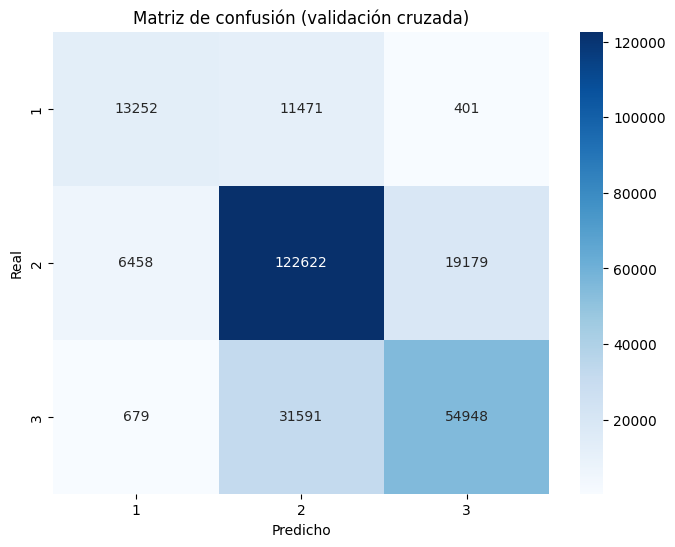

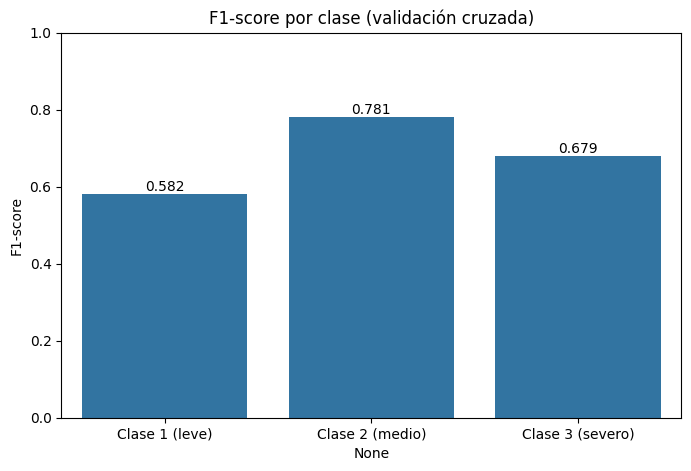

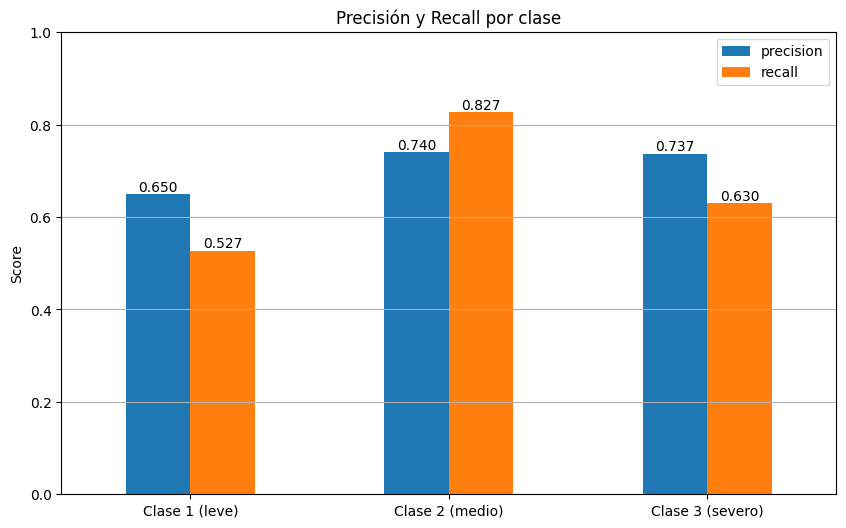

In [ ]:
# Predicciones cruzadas para an√°lisis visual
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(final_model, X, y, cv=skf)

# 1. Matriz de confusi√≥n
cm = confusion_matrix(y, y_pred_cv)
labels = [1, 2, 3]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Matriz de confusi√≥n (validaci√≥n cruzada)")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

# Informe de clasificaci√≥n
report = classification_report(y, y_pred_cv, target_names=["Clase 1 (leve)", "Clase 2 (medio)", "Clase 3 (severo)"], output_dict=True)
report_df = pd.DataFrame(report).transpose()

# 2. F1-score por clase con etiquetas
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=report_df.index[:3], y=report_df.loc[["Clase 1 (leve)", "Clase 2 (medio)", "Clase 3 (severo)"], "f1-score"])
plt.title("F1-score por clase (validaci√≥n cruzada)")
plt.ylabel("F1-score")
plt.ylim(0, 1)

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.3f'),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom')

plt.show()

# 3. Precisi√≥n y Recall por clase con etiquetas
report_df_subset = report_df.loc[["Clase 1 (leve)", "Clase 2 (medio)", "Clase 3 (severo)"], ["precision", "recall"]]
ax2 = report_df_subset.plot(kind="bar", figsize=(10, 6))
plt.title("Precisi√≥n y Recall por clase")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=0)

# A√±adir etiquetas a cada barra
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')

plt.show()

#### üîπ 1. Matriz de Confusi√≥n

La matriz de confusi√≥n permite visualizar c√≥mo el modelo clasifica correctamente o se confunde entre clases. Los valores muestran:

- **Clase 2 (medio)** es la m√°s f√°cil de predecir correctamente, con m√°s de **122.000 aciertos**.
- **Clase 3 (severo)** tiende a confundirse con la clase 2, con m√°s de **31.000 errores de clasificaci√≥n**.
- La **Clase 1 (leve)** tambi√©n sufre confusi√≥n con la clase 2, lo que puede deberse al **desbalance de clases**.

#### üîπ 2. F1-Score por Clase

Este gr√°fico muestra el **equilibrio entre precisi√≥n y recall** por clase:

- **Clase 2 (medio)** alcanza un F1-score de **0.781**, reflejando su predominancia y facilidad de predicci√≥n.
- **Clase 3 (severo)** logra un valor aceptable de **0.679**, a pesar de las confusiones.
- **Clase 1 (leve)** muestra un desempe√±o m√°s bajo (**0.582**), reflejando su menor frecuencia y mayor dificultad.

#### üîπ 3. Precisi√≥n y Recall por Clase

Este gr√°fico permite evaluar la calidad de las predicciones para cada clase:

- **Clase 2 (medio)** mantiene **alta precisi√≥n (0.740)** y **excelente recall (0.827)**.
- **Clase 3 (severo)** logra **alta precisi√≥n (0.737)**, pero su **recall baja a 0.630**, indicando que se pierden algunas instancias verdaderas.
- **Clase 1 (leve)** presenta los peores resultados, especialmente en **recall (0.527)**, lo que indica una alta tasa de falsos negativos.


#### ‚úÖ Conclusi√≥n

El modelo final muestra un **rendimiento robusto**, con excelente comportamiento sobre la clase dominante (Clase 2) y razonables resultados sobre las otras dos clases. A pesar de algunas confusiones, se logra un equilibrio aceptable entre precisi√≥n y recall para un problema de clasificaci√≥n multiclase con datos desbalanceados.

### **Evaluaci√≥n Final en la Competici√≥n DrivenData**

Despu√©s de aplicar t√©cnicas avanzadas de modelado, incluyendo el uso de **LightGBM optimizado con Optuna** y balanceo de clases mediante **SMOTE**, se realiz√≥ la tercera y √∫ltima subida del fichero `submission_final.csv`.

Los resultados obtenidos fueron:

- üìà **Mejor puntuaci√≥n (F1 Score micro):** `0.7325`
- ü•á **Posici√≥n actual:** `#1246`
- üì§ **Subidas realizadas:** `3 de 3 permitidas`

Este resultado representa una mejora respecto a las iteraciones anteriores y posiciona el modelo dentro del **top 25%** de participantes, lo que demuestra la efectividad de la estrategia de preprocesamiento, selecci√≥n de caracter√≠sticas, ajuste de hiperpar√°metros y validaci√≥n cruzada estratificada aplicada a lo largo del proyecto.


### **Conclusi√≥n Final del Proyecto**

A lo largo del desarrollo de esta actividad se ha implementado un pipeline de aprendizaje autom√°tico completo, riguroso y optimizado, para resolver el problema real de clasificaci√≥n del da√±o estructural en edificios tras un terremoto. Se han aplicado m√∫ltiples t√©cnicas de an√°lisis exploratorio, selecci√≥n de variables, validaci√≥n cruzada, y optimizaci√≥n de hiperpar√°metros, combinando **robustez t√©cnica y eficiencia computacional**.

El modelo final, basado en **LightGBM optimizado con Optuna y balanceado con SMOTE**, ha demostrado ser una soluci√≥n s√≥lida, alcanzando un **F1 micro de 0.7325**, lo cual lo posiciona en el **cuartil superior del ranking oficial de DrivenData**. Este rendimiento es especialmente destacable considerando la complejidad del problema y el desbalance de clases.

Adem√°s, la evaluaci√≥n gr√°fica del modelo permiti√≥ identificar fortalezas y debilidades por clase, ofreciendo una interpretaci√≥n clara del comportamiento del sistema y confirmando su aplicabilidad en contextos reales de priorizaci√≥n de recursos tras desastres.

En resumen, el proyecto no solo ha cumplido con los objetivos planteados, sino que ha proporcionado una soluci√≥n precisa, explicable y escalable, integrando herramientas avanzadas de machine learning con una metodolog√≠a reproducible y profesional.